In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [87]:
data = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/fake_data1.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Date']=data['Date'].map(dt.datetime.toordinal)
data.head()

Price    Date       County     Ozone      PM2.5  Conductance  \
0  316698.1588  733773  Los Angeles  0.024906  13.048837   484.000000   
1  283298.8963  733804  Los Angeles  0.032330  11.807599   487.333333   
2  290000.0000  733832  Los Angeles  0.043829   9.498854   518.333333   
3  289710.0000  733863  Los Angeles  0.046979  10.973611   497.666667   
4  297410.0000  733893  Los Angeles  0.046677  11.404237   498.000000   

         PH  oil_count  Gas_Well_Number  positive_tests  fire  
0  8.100000          7          1.71246               0    17  
1  8.266667          7          1.71246               0    16  
2  8.233333          7          1.71246               0    17  
3  8.433333          7          1.71246               0    15  
4  8.500000          7          1.71246               0    17

In [23]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model, X_train, y_train):
    pred = cross_val_score(model, X_train, y_train, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [36]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
from sklearn.linear_model import Ridge, Lasso

def train_test(X, y):
    tscv = TimeSeriesSplit(n_splits=15, test_size=8)
    pipeline = Pipeline([
      ('std_scalar', StandardScaler())
  ])

    for train_index, test_index in tscv.split(X):
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      X_train = pipeline.fit_transform(X_train)
      X_test = pipeline.transform(X_test)

      model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
      model.fit(X_train, y_train)
      # lin_reg = LinearRegression(normalize=True)
      # lin_reg.fit(X_train,y_train)


      test_pred = model.predict(X_test)
      train_pred = model.predict(X_train)

      print('Test set evaluation:\n_____________________________________')
      print_evaluate(y_test, test_pred)
      print('Train set evaluation:\n_____________________________________')
      print_evaluate(y_train, train_pred)

      results_df = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred) , cross_val(Ridge(), X_train, y_train)]], 
                              columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
      print(results_df)
      plot.scatter([i for i in range(len(X_train))], y_train, color = 'red')
      plot.plot([i for i in range(len(X_train))], train_pred, color = 'blue')
      plot.title('Linear Regression Training Data')
      plot.xlabel('Months from 2010 to 2021')
      plot.ylabel('House Price')
      plot.show()
      
      plot.scatter([i for i in range(len(X_test))], y_test, color = 'red')
      plot.plot([i for i in range(len(X_test))], test_pred, color = 'blue')
      plot.title('LR Testing Data')
      plot.xlabel('Months from 2021-1 to 2021-12')
      plot.ylabel('House Price')
      plot.show()

In [37]:
def county_dataset(dataset, start, end):
  dataset = dataset[start:end]
  dataset['Price'] = np.log10(dataset['Price'])
  y = dataset[['Price']]
  dataset = dataset.drop(['County','Price'], axis=1)
  #print(dataset)
  return dataset, y


Los Angeles
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.0027341424813806803
MSE: 8.521875471317233e-06
RMSE: 0.002919225149130713
R2 Square 0.0035774662670656765
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0015577719388196326
MSE: 3.6839039980129536e-06
RMSE: 0.001919349889419059
R2 Square 0.2740722825069021
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.002734  0.000009  0.002919   0.003577         -5.081999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


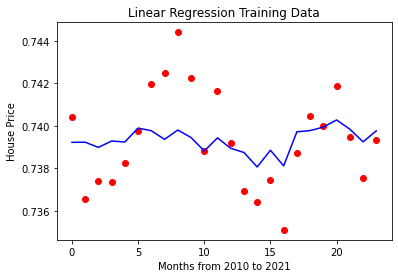

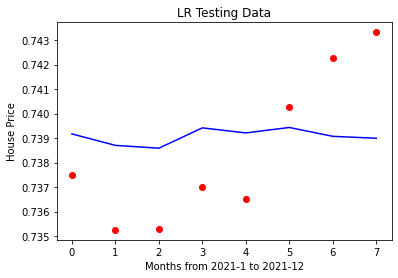

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.005373406359015967
MSE: 3.0488659074134075e-05
RMSE: 0.005521653653945897
R2 Square -17.057927475257582
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0017496213340584578
MSE: 4.496904377303402e-06
RMSE: 0.0021205905727658516
R2 Square 0.2622654170154426
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.005373  0.00003  0.005522 -17.057927         -4.132379


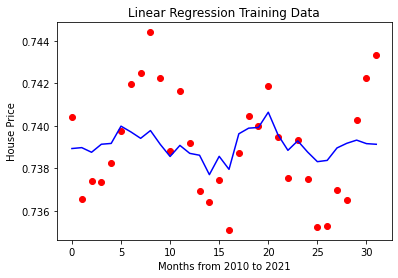

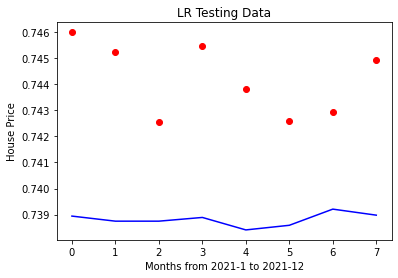

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.009003032733017988
MSE: 8.68794728061555e-05
RMSE: 0.00932091587807526
R2 Square -14.888014599376408
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.00234150439673865
MSE: 7.3305214698955216e-06
RMSE: 0.0027074935770737335
R2 Square 0.2170340391233253
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.009003  0.000087  0.009321 -14.888015         -3.230013


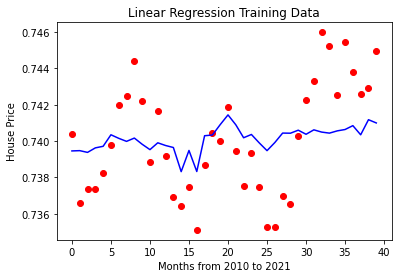

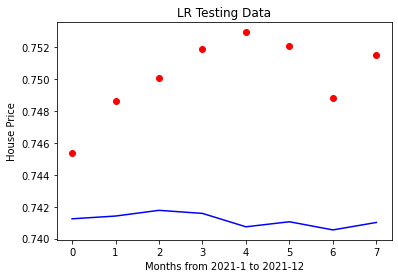

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.005564288685549076
MSE: 3.5783942307401704e-05
RMSE: 0.00598196809648812
R2 Square -6.218099544991523
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.002948681311919825
MSE: 1.3523315565634222e-05
RMSE: 0.003677406092021144
R2 Square 0.4059113989105999
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.005564  0.000036  0.005982    -6.2181         -3.113735


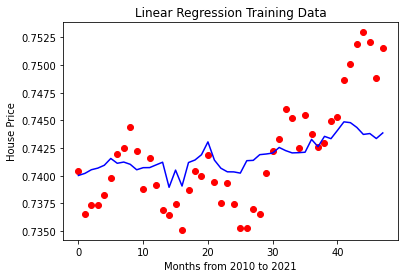

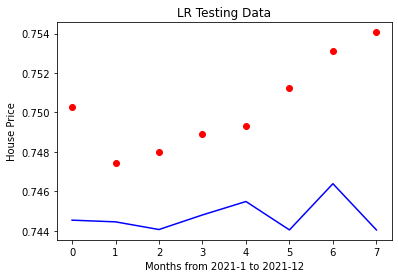

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.011081591057267262
MSE: 0.000220411839682866
RMSE: 0.014846273595851115
R2 Square -64.78764122060186
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.003036086539441804
MSE: 1.3302903959119719e-05
RMSE: 0.0036473146229958993
R2 Square 0.5422104200850266
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.011082  0.00022  0.014846 -64.787641         -3.187872


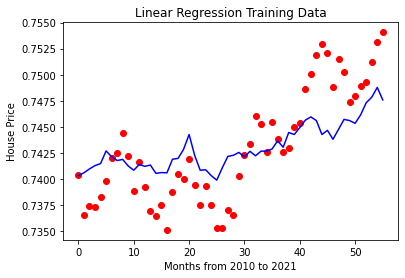

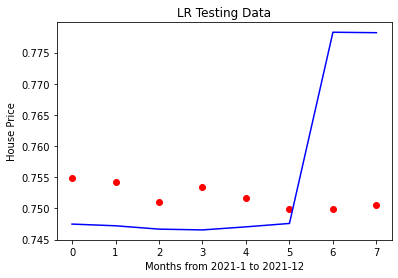

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.005121408339221048
MSE: 2.909923488049535e-05
RMSE: 0.005394370665841878
R2 Square -7.3304514577017965
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0035178228752354088
MSE: 1.7374494297756575e-05
RMSE: 0.004168272339681822
R2 Square 0.49796833385149686
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.005121  0.000029  0.005394  -7.330451        -49.292746


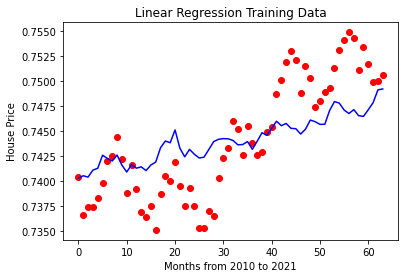

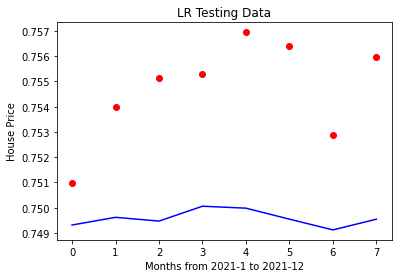

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.002105451647121531
MSE: 6.697298198237894e-06
RMSE: 0.002587913869941945
R2 Square -0.6802069178412917
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0035157413534162942
MSE: 1.7402999283249955e-05
RMSE: 0.00417169021899397
R2 Square 0.5875854818553765
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.002105  0.000007  0.002588  -0.680207         -3.327218


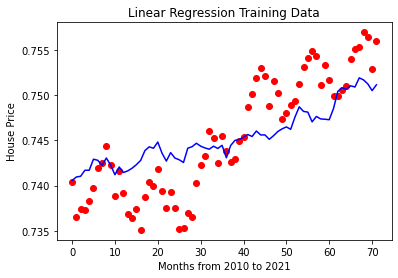

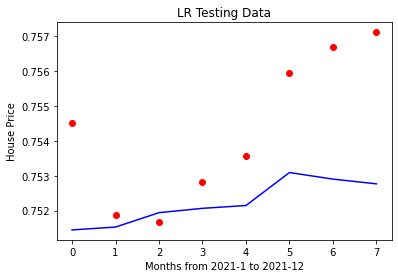

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.0033346772894059934
MSE: 1.4508561034756552e-05
RMSE: 0.0038090105059918845
R2 Square -2.842505754205242
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0034319175713748524
MSE: 1.6874144329738558e-05
RMSE: 0.004107815031100908
R2 Square 0.630127865637016
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.003335  0.000015  0.003809  -2.842506         -1.824916


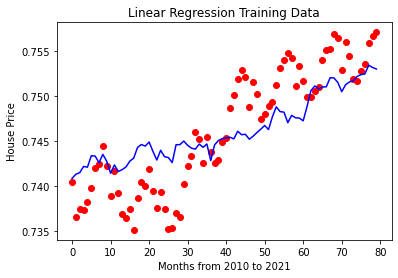

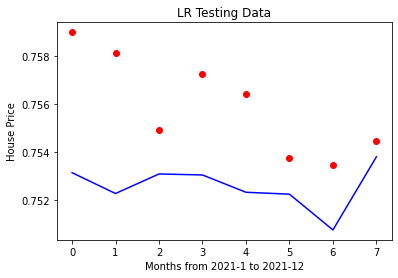

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.004267742425650728
MSE: 2.1402691907341967e-05
RMSE: 0.004626304346596964
R2 Square -4.474847381697114
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0033866236989980275
MSE: 1.6558874272805162e-05
RMSE: 0.004069259671341356
R2 Square 0.6663396246102349
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.004268  0.000021  0.004626  -4.474847         -1.696958


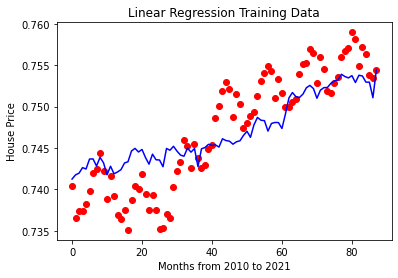

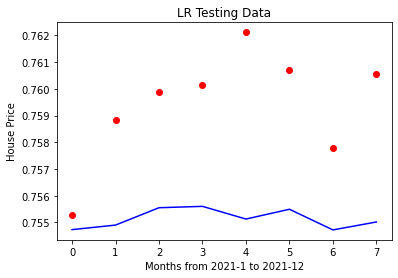

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.0030890534748283516
MSE: 1.1795713323706914e-05
RMSE: 0.0034344888009290283
R2 Square -2.522880571791658
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0033575222636252496
MSE: 1.613321691075049e-05
RMSE: 0.004016617595782612
R2 Square 0.7190852623848807
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.003089  0.000012  0.003434  -2.522881         -1.886308


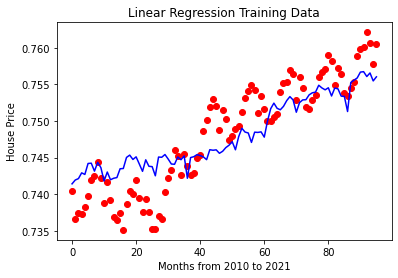

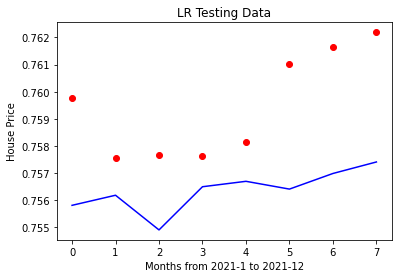

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.0038683824079197293
MSE: 2.0226569704359933e-05
RMSE: 0.004497395880324517
R2 Square -3.9590206396095686
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.003295217044617121
MSE: 1.561108337402373e-05
RMSE: 0.003951086353653098
R2 Square 0.7498556577842963
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.003868  0.00002  0.004497  -3.959021     

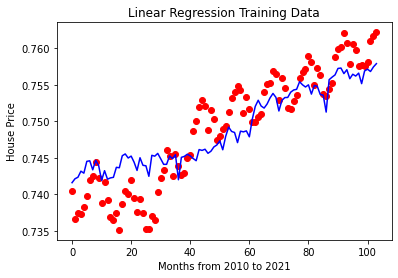

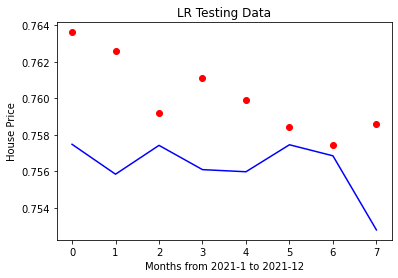

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.0037285051470270364
MSE: 2.0913604969245677e-05
RMSE: 0.0045731395090512685
R2 Square -4.31829550452186
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0032728230337177935
MSE: 1.566989978034606e-05
RMSE: 0.00395852242387814
R2 Square 0.7641705572701558
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.003729  

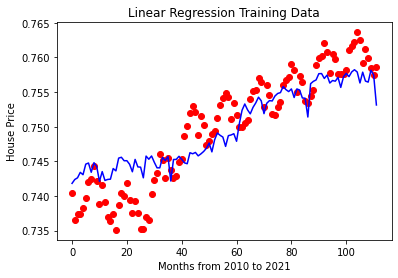

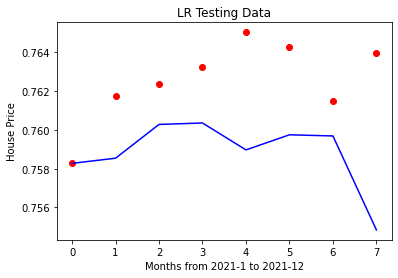

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.004566074509411405
MSE: 2.571419167617245e-05
RMSE: 0.00507091625607961
R2 Square -3.2997156484900323
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.003261697137991133
MSE: 1.5821917468398034e-05
RMSE: 0.003977677396219814
R2 Square 0.7816327283177926
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross 

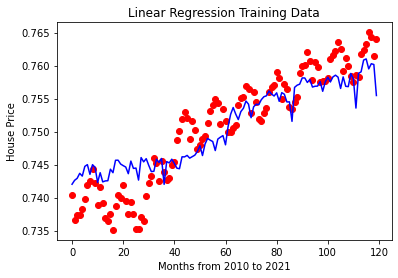

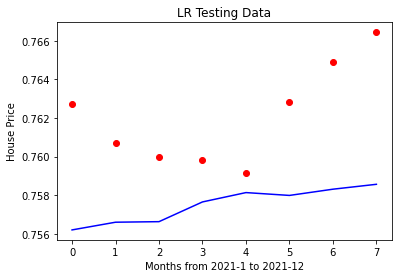

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.006266535445350413
MSE: 5.0109012279589974e-05
RMSE: 0.007078771947138146
R2 Square -16.1065520117754
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.003242905963643847
MSE: 1.5656211632897873e-05
RMSE: 0.003956793099581765
R2 Square 0.7939395478179176
__________________________________
   Model       MAE      

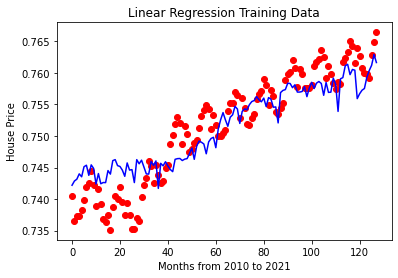

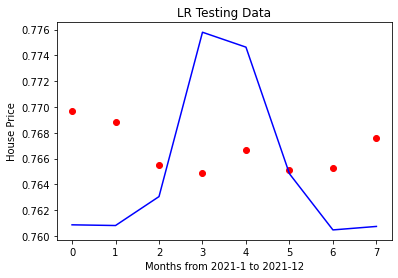

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.008397926994274371
MSE: 7.372200978977555e-05
RMSE: 0.008586152210960131
R2 Square -18.890769143540822
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0032211288500119967
MSE: 1.5744961242808102e-05
RMSE: 0.003967992092079834
R2 Square 0.8141926630055889
_________________________

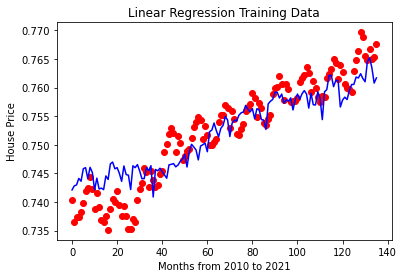

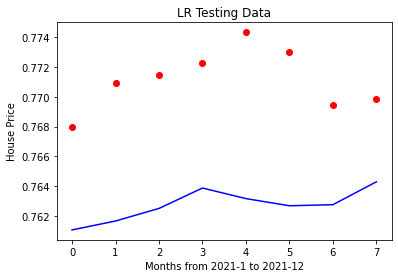

Orange
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.02634389017324823
MSE: 0.0007913906281294203
RMSE: 0.0281316659323514
R2 Square 0.033756885124793024
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.01470660613891143
MSE: 0.00029868361264984996
RMSE: 0.017282465467920078
R2 Square 0.3685201173743592
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.026344  0.000791  0.028132   0.033757          -6.00782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


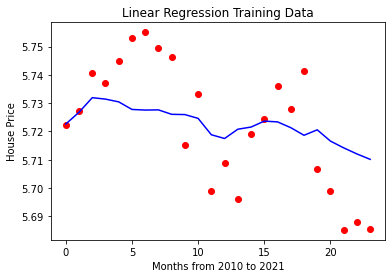

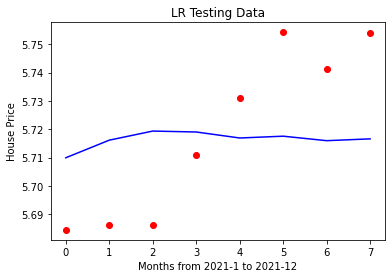

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.05333145908466341
MSE: 0.0033451057370990755
RMSE: 0.05783688906830203
R2 Square -5.246822968732267
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.01748592026287915
MSE: 0.00040889006616848944
RMSE: 0.020221030294435775
R2 Square 0.2732419823112405
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.053331  0.003345  0.057837  -5.246823        -62.553809


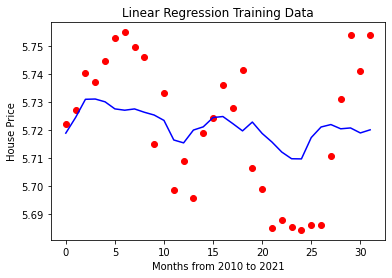

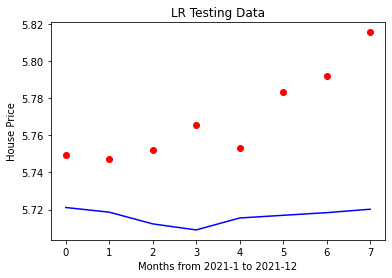

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.08652648150436615
MSE: 0.007526260753164071
RMSE: 0.08675402442056547
R2 Square -314.42400321582335
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.02219092802569711
MSE: 0.000783167581024171
RMSE: 0.027985131427673716
R2 Square 0.1571882891848787
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.086526  0.007526  0.086754 -314.424003        -10.332993


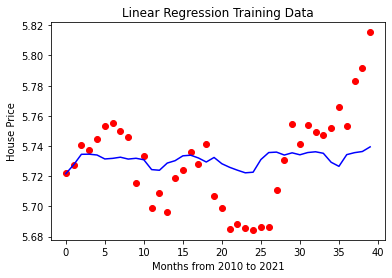

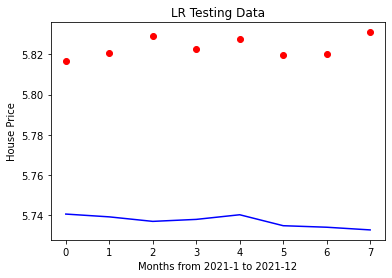

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.0740939396941025
MSE: 0.005550218543449656
RMSE: 0.07449978888191332
R2 Square -60.380298603621846
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0291345208330334
MSE: 0.0013823883292472302
RMSE: 0.03718048317662413
R2 Square 0.29475416022010814
__________________________________
   Model       MAE      MSE    RMSE  R2 Square  Cross Validation
0  Ridge  0.074094  0.00555  0.0745 -60.380299        -21.435851


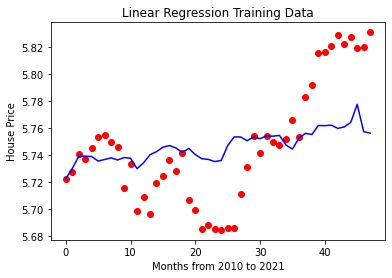

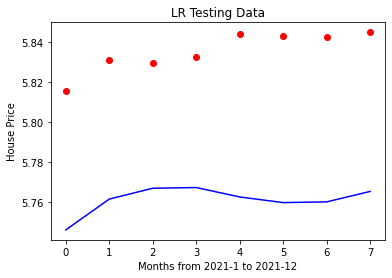

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.048970128930304835
MSE: 0.002423017029230944
RMSE: 0.04922415087364072
R2 Square -69.47912830821278
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03376471236206301
MSE: 0.0016243247136723158
RMSE: 0.040302911975095744
R2 Square 0.3886135750929677
__________________________________
   Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.04897  0.002423  0.049224 -69.479128        -11.103857


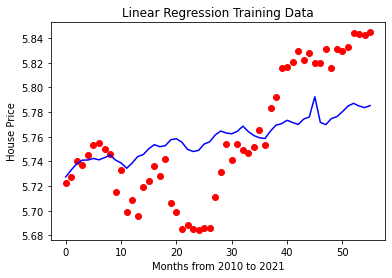

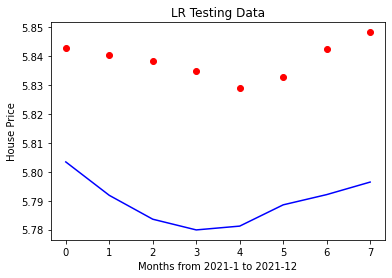

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.0463281385322486
MSE: 0.002172637851488211
RMSE: 0.046611563495426875
R2 Square -96.49808856934307
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0346301833119141
MSE: 0.0016188786430718612
RMSE: 0.040235291015125775
R2 Square 0.463488727340146
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.046328  0.002173  0.046612 -96.498089         -26.93172


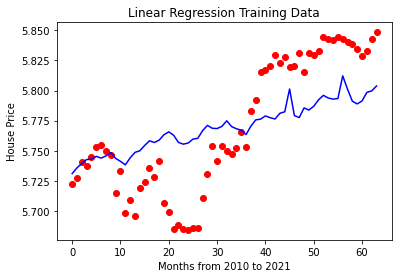

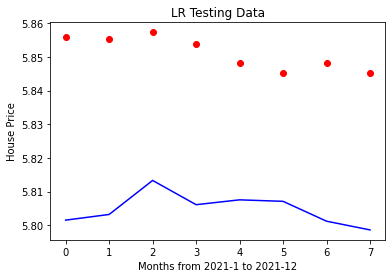

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.038152827103204334
MSE: 0.0014818295235531755
RMSE: 0.03849453887960181
R2 Square -11.776377536340208
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.034768972603989735
MSE: 0.001594249668908549
RMSE: 0.03992805616240977
R2 Square 0.5238425926065002
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.038153  0.001482  0.038495 -11.776378        -10.575206


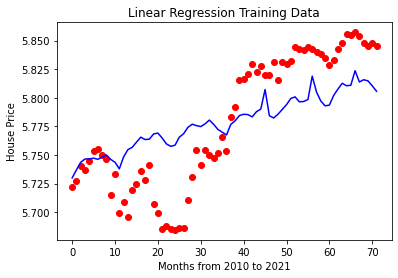

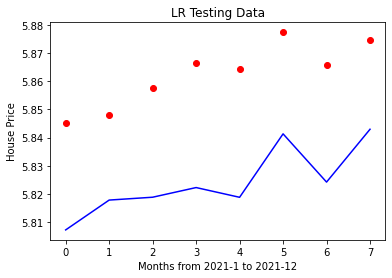

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.041632963265474054
MSE: 0.0018205682683683179
RMSE: 0.042668117703600635
R2 Square -35.067669366848655
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03413707781059111
MSE: 0.0015459016411906348
RMSE: 0.03931795570970895
R2 Square 0.5777322941226521
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.041633  0.001821  0.042668 -35.067669        -10.053767


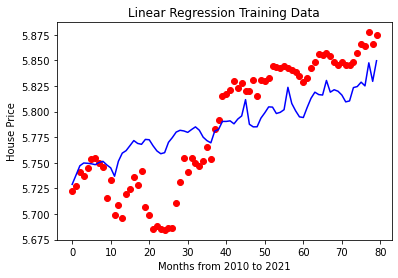

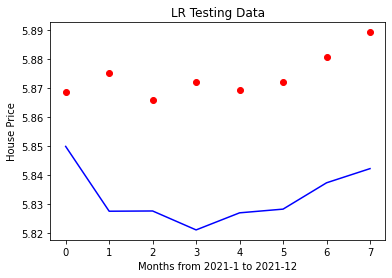

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.0494182221730356
MSE: 0.0025535512221393428
RMSE: 0.05053267479699984
R2 Square -309.8024663373423
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0336181866930454
MSE: 0.001529656181113946
RMSE: 0.03911081923347996
R2 Square 0.6142111552762515
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.049418  0.002554  0.050533 -309.802466         -5.843927


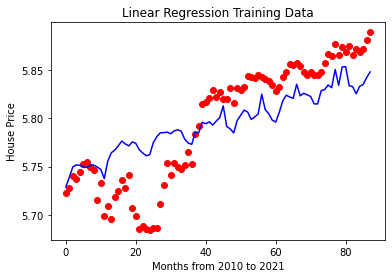

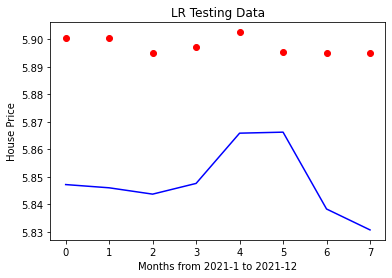

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.049635267345713
MSE: 0.0025215482570662704
RMSE: 0.0502150202336539
R2 Square -23.932422384671842
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03288254211878186
MSE: 0.0015370597804772528
RMSE: 0.03920535397719618
R2 Square 0.6541722226731759
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.049635  0.002522  0.050215 -23.932422        -12.343565


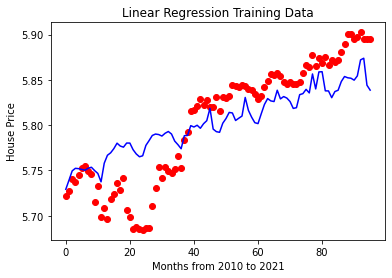

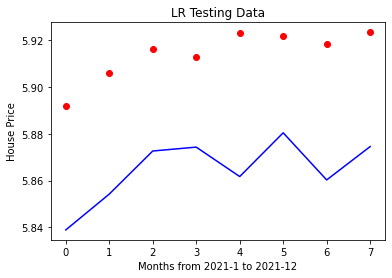

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.03613740303031088
MSE: 0.0013768015433057107
RMSE: 0.03710527648873824
R2 Square -23.13540546763818
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03222708811446632
MSE: 0.001535372239307812
RMSE: 0.03918382624639676
R2 Square 0.6920725600710935
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.036137  0.001377  0.037105 -23.135405         -4

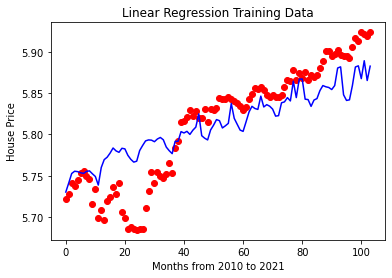

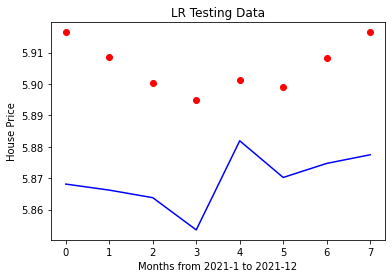

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.040691052128844496
MSE: 0.0017907847420438618
RMSE: 0.04231766465725468
R2 Square -45.795416468335986
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0316707733159838
MSE: 0.001515884991158537
RMSE: 0.03893436773800927
R2 Square 0.7095077663571767
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.040691  0.0017

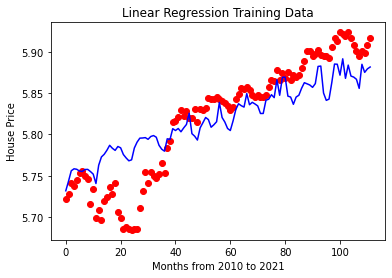

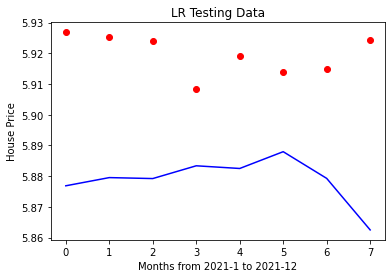

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.04780002708550535
MSE: 0.002446895237320111
RMSE: 0.04946610190140427
R2 Square -14.05325527526741
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.031399831528539486
MSE: 0.001498763718438346
RMSE: 0.03871386984581038
R2 Square 0.7279474184685608
__________________________________
   Model     MAE       MSE      RMSE  R2 Square  Cross Validati

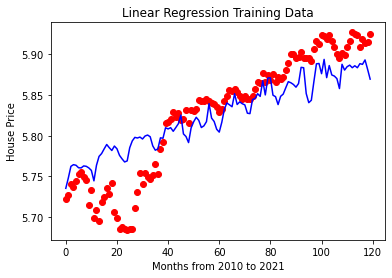

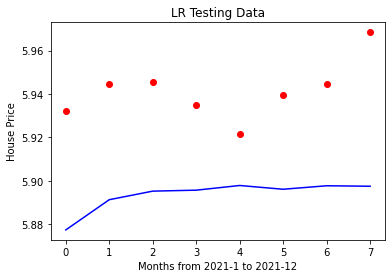

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.06824742516126325
MSE: 0.005551321411293901
RMSE: 0.07450719033283902
R2 Square -7.833726335656104
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.030829869487980728
MSE: 0.001503066392187437
RMSE: 0.0387694002041228
R2 Square 0.7480303810959538
__________________________________
   Model       MAE       MSE   

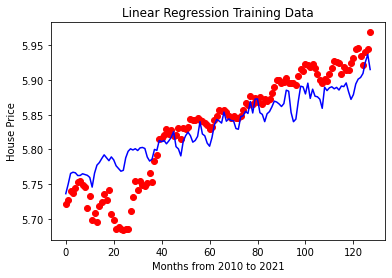

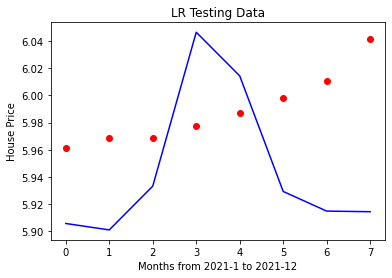

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.12084764450669339
MSE: 0.014785593746068807
RMSE: 0.12159602685149218
R2 Square -111.33133067254326
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03055287893029771
MSE: 0.0015976886804070977
RMSE: 0.0399710980635646
R2 Square 0.7720994606318722
_________________________________

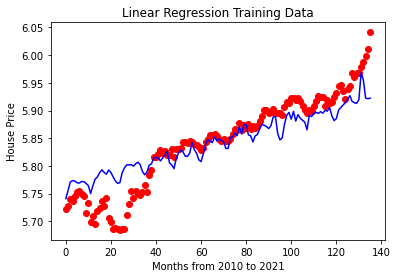

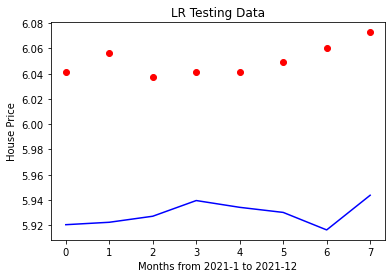

Riverside
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.02575334735142909
MSE: 0.0008980800213472606
RMSE: 0.02996798327127237
R2 Square -1.072973522862421
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.008696929113703419
MSE: 0.00010564331739155585
RMSE: 0.010278293505809019
R2 Square 0.1995697034382815
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.025753  0.000898  0.029968  -1.072974        -19.312505


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


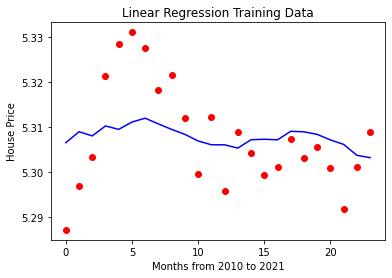

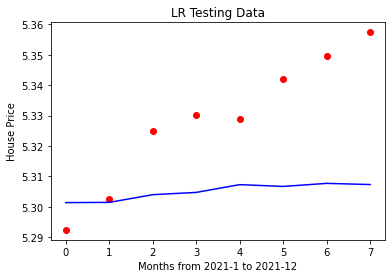

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.07937240112672328
MSE: 0.006962523790338681
RMSE: 0.08344173889809992
R2 Square -9.882113053883783
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.012265007116559201
MSE: 0.00020324847378960616
RMSE: 0.014256523902747337
R2 Square 0.29454484777937195
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.079372  0.006963  0.083442  -9.882113        -30.388246


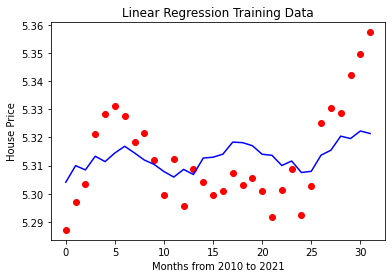

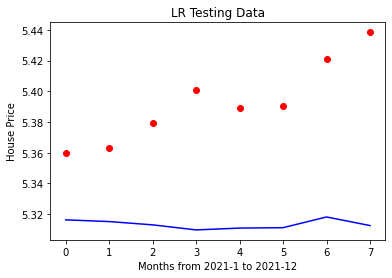

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.10545927447828463
MSE: 0.011413492633808418
RMSE: 0.10683394888240544
R2 Square -78.89074717832052
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.021914571998410314
MSE: 0.0007505505917919916
RMSE: 0.027396178415830037
R2 Square 0.45432203098460344
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.105459  0.011413  0.106834 -78.890747        -16.381092


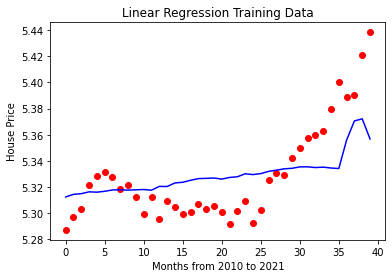

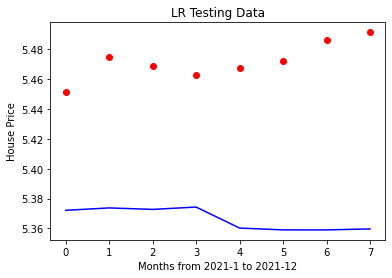

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.18079701818618643
MSE: 0.032814905475042636
RMSE: 0.18114884894760616
R2 Square -362.6356560956451
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03056844578634064
MSE: 0.0014623144545584553
RMSE: 0.03824022037800587
R2 Square 0.6350353996912705
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.180797  0.032815  0.181149 -362.635656        -12.028593


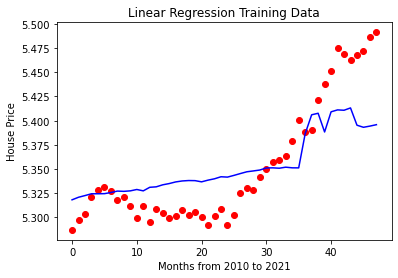

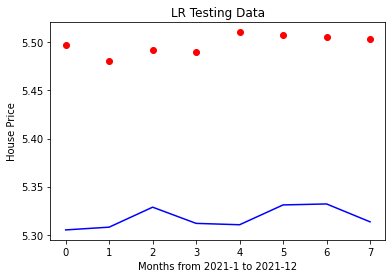

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.07621873893483044
MSE: 0.005998416287780712
RMSE: 0.07744944343105838
R2 Square -49.7003857864989
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.045562135048033206
MSE: 0.0026470763315506493
RMSE: 0.05144974568985399
R2 Square 0.5618918070892511
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.076219  0.005998  0.077449 -49.700386        -13.314661


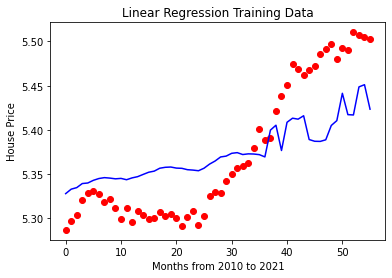

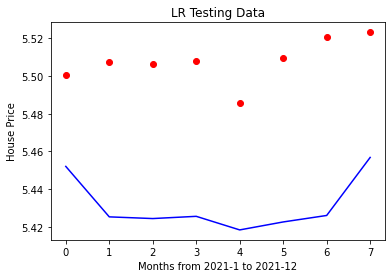

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.10194448196832939
MSE: 0.012078925841276476
RMSE: 0.1099041666238204
R2 Square -472.5731841495558
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0476830230360616
MSE: 0.0026661007568286417
RMSE: 0.051634298260251794
R2 Square 0.6332173002093007
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.101944  0.012079  0.109904 -472.573184        -32.524935


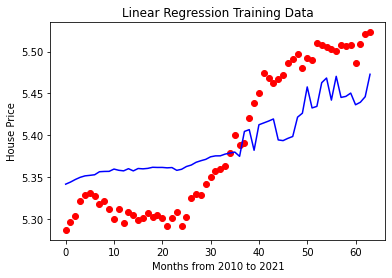

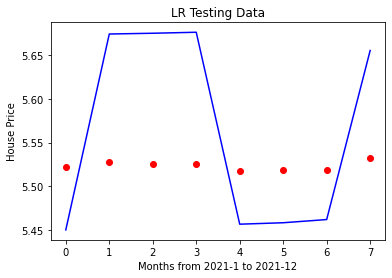

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.06348805408380653
MSE: 0.004138935086229341
RMSE: 0.06433455592626207
R2 Square -17.562465571388515
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04910788571600929
MSE: 0.002821664831543867
RMSE: 0.053119345172393334
R2 Square 0.6564244522662267
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.063488  0.004139  0.064335 -17.562466       -306.519525


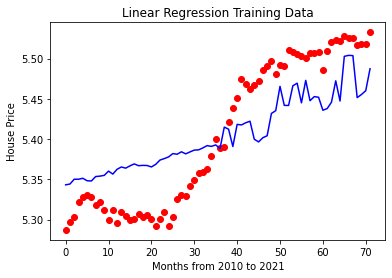

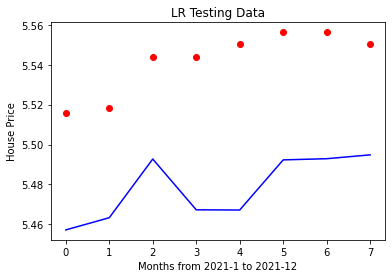

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.0620485654100289
MSE: 0.00425325976923677
RMSE: 0.06521702054860196
R2 Square -31.942077481021173
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04895005339101029
MSE: 0.0028051889907235858
RMSE: 0.052964034879563186
R2 Square 0.6916985383123062
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.062049  0.004253  0.065217 -31.942077         -23.87078


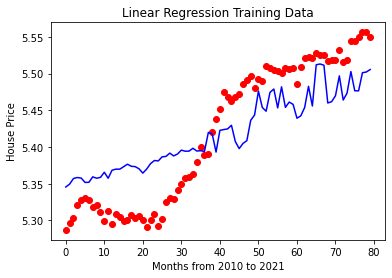

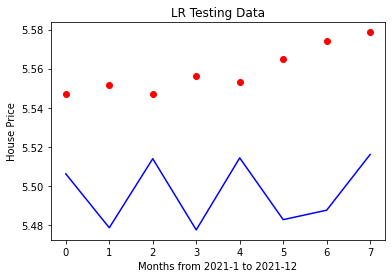

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.06355400567230818
MSE: 0.00406909952172076
RMSE: 0.06378949381928627
R2 Square -224.50507546891723
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04860117755677149
MSE: 0.002829901480533149
RMSE: 0.05319681833092228
R2 Square 0.7144427743329034
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.063554  0.004069  0.063789 -224.505075        -10.606614


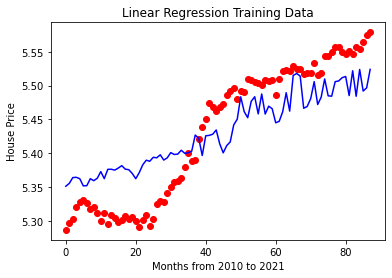

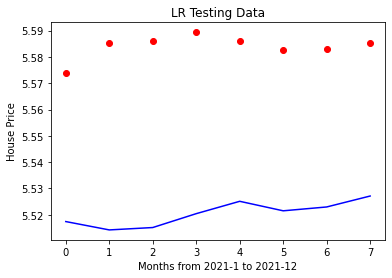

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.06408536666171005
MSE: 0.004220564261042346
RMSE: 0.06496586997064187
R2 Square -156.31450814583363
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04771165939379818
MSE: 0.0028010332399749788
RMSE: 0.05292478852083378
R2 Square 0.7421439399622234
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.064085  0.004221  0.064966 -156.314508        -22.048491


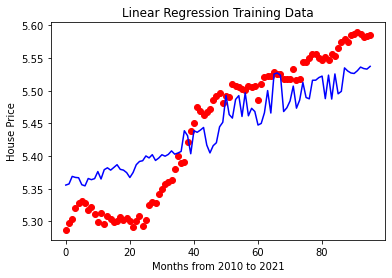

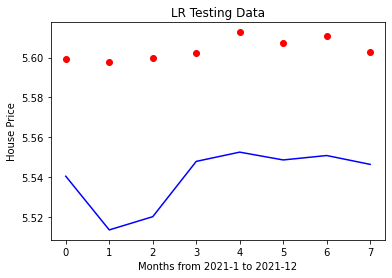

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.06265171981225581
MSE: 0.004125429414554668
RMSE: 0.06422950579410266
R2 Square -56.27883021609703
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04712971435784715
MSE: 0.0027947030661758607
RMSE: 0.05286495120754261
R2 Square 0.764027044553476
__________________________________
   Model       MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.062652  0.004125  0.06423  -56.27883        -11.36

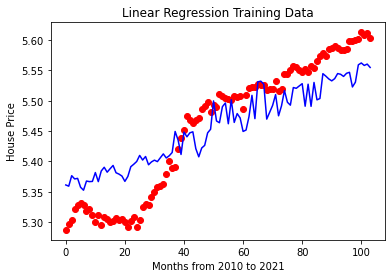

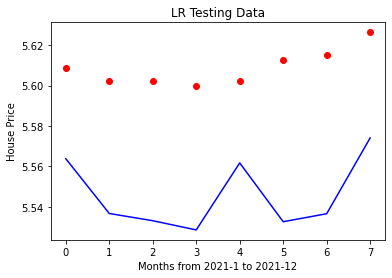

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.04546069335408476
MSE: 0.0021616187062907075
RMSE: 0.046493211400060415
R2 Square -186.14372594613516
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0467932048125349
MSE: 0.0028247464868462854
RMSE: 0.05314834415902612
R2 Square 0.7746605312051278
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.045461  0.00

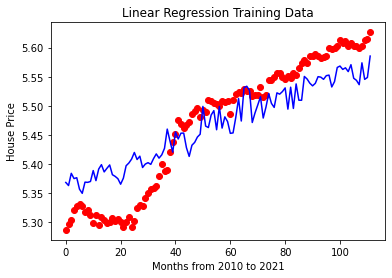

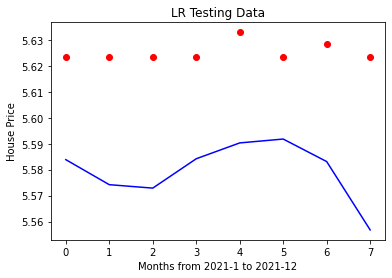

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.07321970148758794
MSE: 0.005929565553514393
RMSE: 0.07700367233784629
R2 Square -13.682837018091478
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04626121255348659
MSE: 0.0028218155514933676
RMSE: 0.05312076384516103
R2 Square 0.7870008491459641
__________________________________
   Model      MAE      MSE      RMSE  R2 Square  Cross Validat

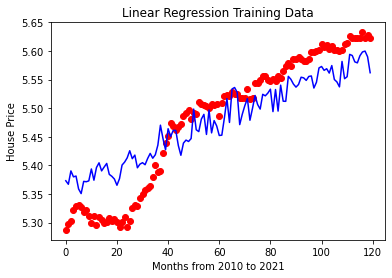

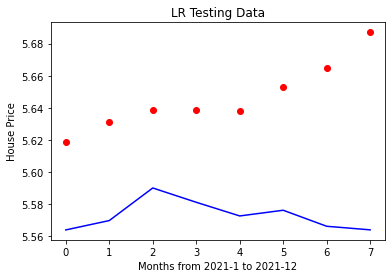

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.1236948456360335
MSE: 0.01935222626522394
RMSE: 0.13911227934738163
R2 Square -48.19137369113351
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04528939479123908
MSE: 0.0028050185047937054
RMSE: 0.0529624254051276
R2 Square 0.8011372793898408
__________________________________
   Model       MAE       MSE     

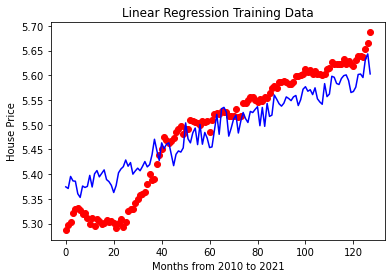

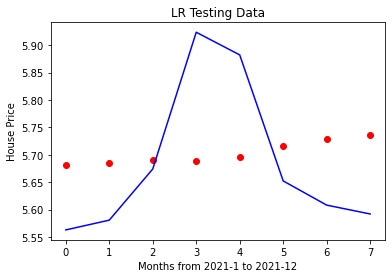

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.14597955547141495
MSE: 0.021403252317037103
RMSE: 0.14629850415174142
R2 Square -509.40406736893215
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04531608044185987
MSE: 0.0031007401018277843
RMSE: 0.05568428954227381
R2 Square 0.8042520471247965
________________________________

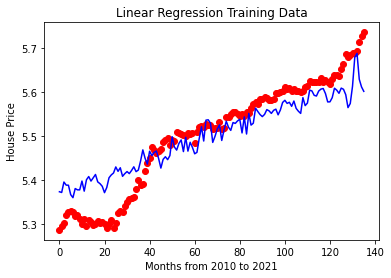

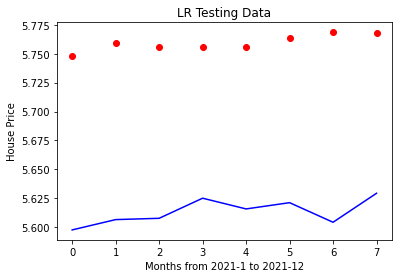

Sacramento
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.015619578302515924
MSE: 0.00034557952436375694
RMSE: 0.018589769346706725
R2 Square -0.15150785446046666
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.01599414969036217
MSE: 0.000325371682882451
RMSE: 0.018038062060056537
R2 Square 0.3335450000968323
__________________________________
   Model      MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.01562  0.000346  0.01859  -0.151508        -32.134287


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


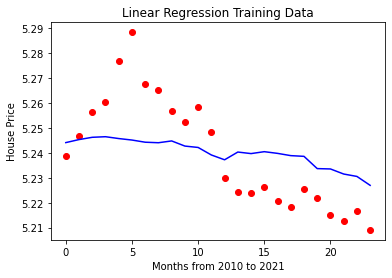

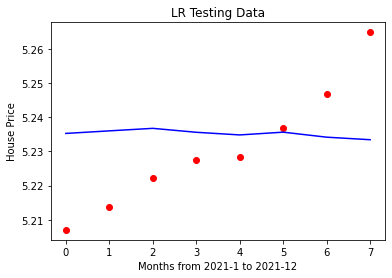

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.07045367390454604
MSE: 0.005819295739002139
RMSE: 0.07628430860276667
R2 Square -6.1022751195598
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.01613795507568569
MSE: 0.00033879698616585675
RMSE: 0.018406438714913233
R2 Square 0.25865474171932745
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.070454  0.005819  0.076284  -6.102275        -41.455363


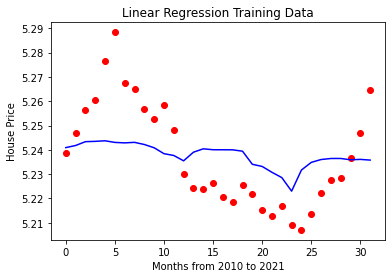

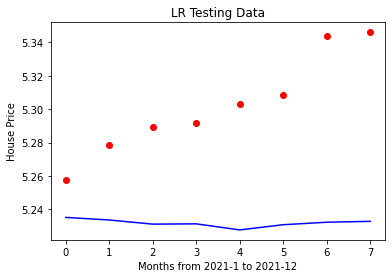

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.14450419596648278
MSE: 0.020993114098896752
RMSE: 0.1448900068979802
R2 Square -330.15398959691834
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.025991088367331196
MSE: 0.001032963835660241
RMSE: 0.03213975475420186
R2 Square 0.13530293677641214
__________________________________
   Model       MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.144504  0.020993  0.14489 -330.15399        -62.715607


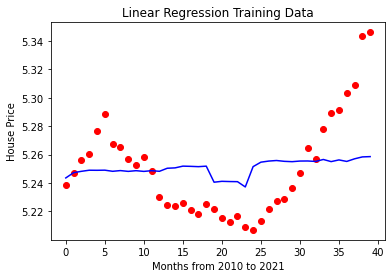

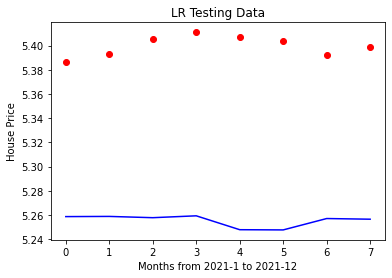

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.11493107641105227
MSE: 0.013472588132047946
RMSE: 0.11607147854683314
R2 Square -44.89337533384338
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04323767313028385
MSE: 0.0028315968796306617
RMSE: 0.05321275110000104
R2 Square 0.3089683853153621
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.114931  0.013473  0.116071 -44.893375        -149.90099


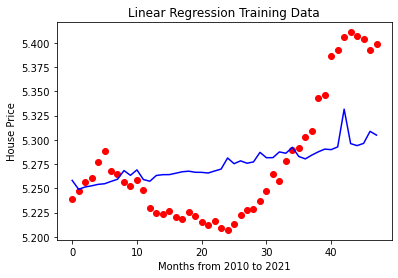

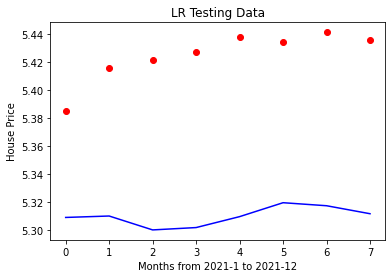

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.08893230665509766
MSE: 0.008148109893405909
RMSE: 0.09026688148709863
R2 Square -37.50834586187713
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05048516858533877
MSE: 0.0033790683287648004
RMSE: 0.058129754246554324
R2 Square 0.461658974562249
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.088932  0.008148  0.090267 -37.508346        -68.441572


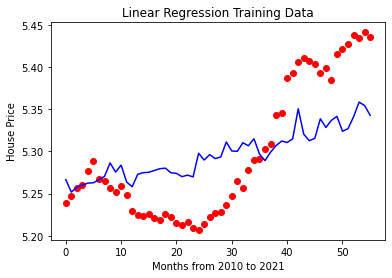

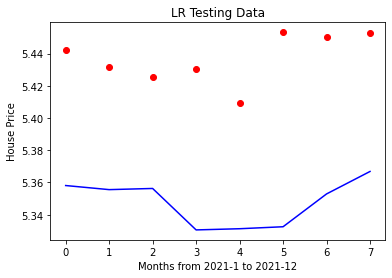

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.06499166223086017
MSE: 0.004717949404920277
RMSE: 0.06868733074534399
R2 Square -357.18729860794286
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05301025930397785
MSE: 0.003527931548995919
RMSE: 0.05939639340057542
R2 Square 0.5397436971508797
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.064992  0.004718  0.068687 -357.187299         -49.86372


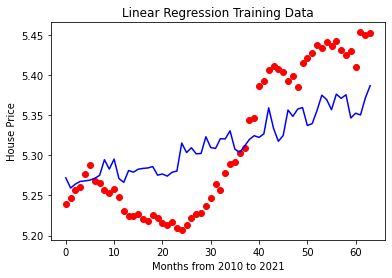

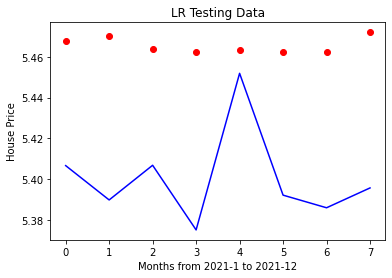

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.0980902291614093
MSE: 0.010273260725017766
RMSE: 0.1013570950896767
R2 Square -22.905104590214474
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05327786583888808
MSE: 0.0034919653515261173
RMSE: 0.05909285364175703
R2 Square 0.6151320258749526
__________________________________
   Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.09809  0.010273  0.101357 -22.905105        -45.373172


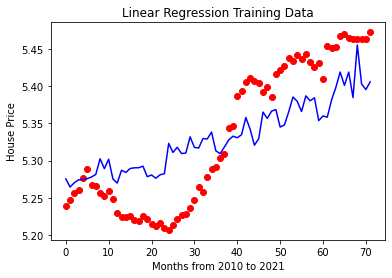

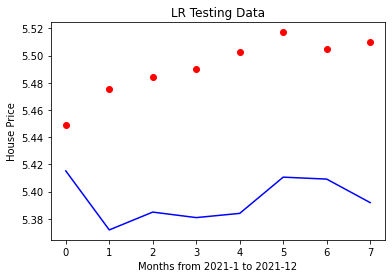

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.08712586956618051
MSE: 0.007861742320836319
RMSE: 0.08866646672128263
R2 Square -85.11473060634624
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.054625426137961244
MSE: 0.003727952286743742
RMSE: 0.061056959363726446
R2 Square 0.6458844150330627
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.087126  0.007862  0.088666 -85.114731         -33.07275


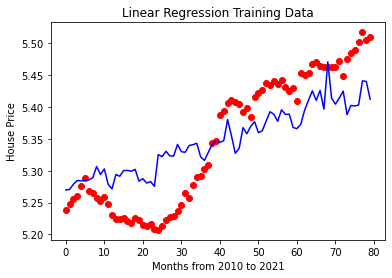

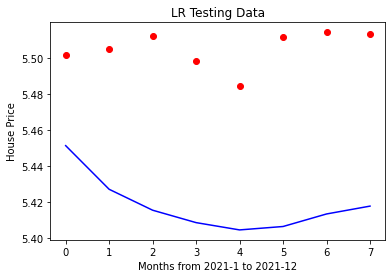

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.1072738117830373
MSE: 0.01176434213442758
RMSE: 0.1084635521012823
R2 Square -853.6519754785539
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05546242051713075
MSE: 0.0038181812187801658
RMSE: 0.061791433215132384
R2 Square 0.6719334530607977
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.107274  0.011764  0.108464 -853.651975        -28.126009


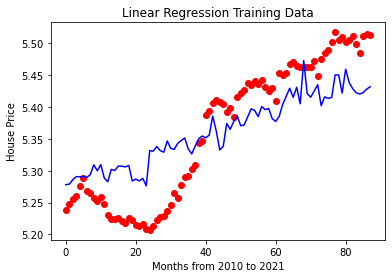

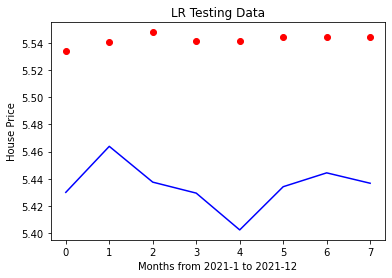

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.08868962634103539
MSE: 0.008304124066409756
RMSE: 0.09112696673548262
R2 Square -63.50650927033489
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05674452604428588
MSE: 0.004079981510361207
RMSE: 0.06387473295725946
R2 Square 0.689991995358181
__________________________________
   Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.08869  0.008304  0.091127 -63.506509        -16.742443


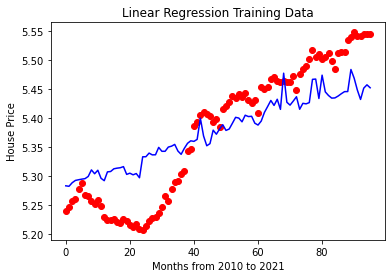

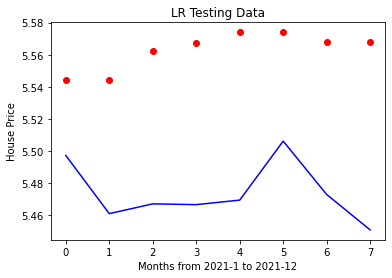

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.06729538166179383
MSE: 0.004982061570448126
RMSE: 0.07058372029333765
R2 Square -42.60937796259261
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05682561781705267
MSE: 0.004208910735386219
RMSE: 0.06487611837483974
R2 Square 0.7120853353610874
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.067295  0.004982  0.070584 -42.609378         -9.

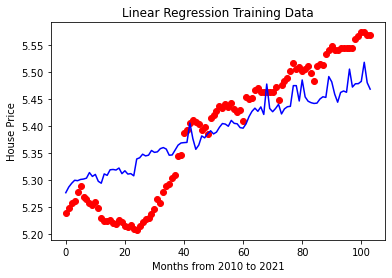

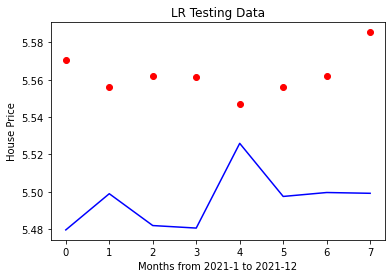

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.06679831273899917
MSE: 0.00467773117956309
RMSE: 0.06839394110272554
R2 Square -829.5060080217171
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05643476404701254
MSE: 0.00426013475934186
RMSE: 0.0652697078233223
R2 Square 0.7258661707535049
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.066798  0.004678  

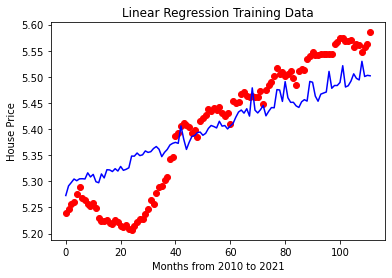

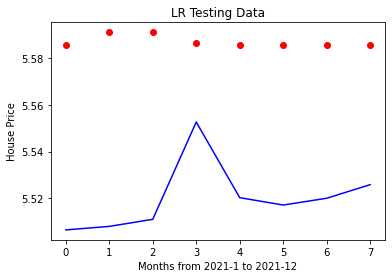

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.07505273337318263
MSE: 0.005847811865066572
RMSE: 0.07647098708050375
R2 Square -22.413994977174276
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05582812904125824
MSE: 0.004269821727333643
RMSE: 0.06534387291348473
R2 Square 0.7428923470609476
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Valida

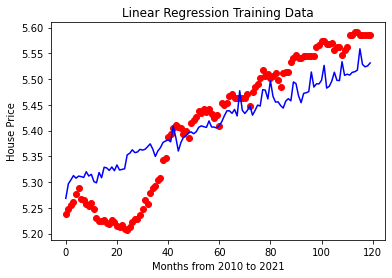

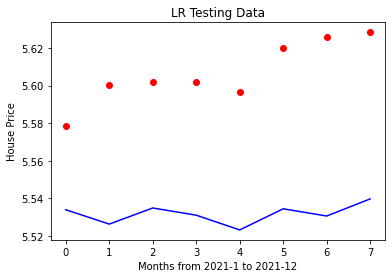

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.06899296608022532
MSE: 0.005974875765062602
RMSE: 0.07729732055551862
R2 Square -17.179614442873458
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05520497280985843
MSE: 0.004282715891375442
RMSE: 0.06544246244889813
R2 Square 0.7584535517349074
__________________________________
   Model       MAE       MSE  

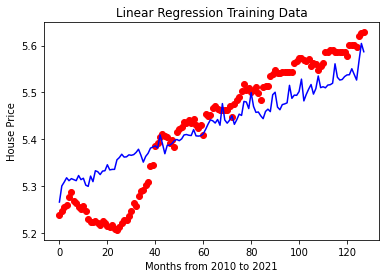

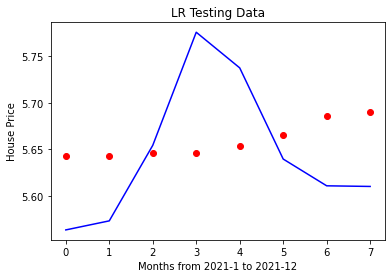

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.09318995743379521
MSE: 0.009297493174118071
RMSE: 0.09642350944721972
R2 Square -278.65786190854044
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05466987513070351
MSE: 0.004360358242518372
RMSE: 0.06603300873440776
R2 Square 0.7784049747934803
_________________________________

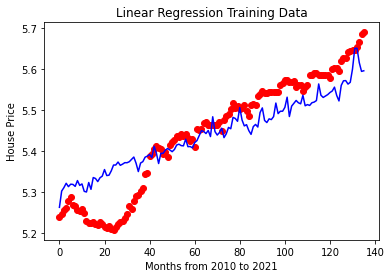

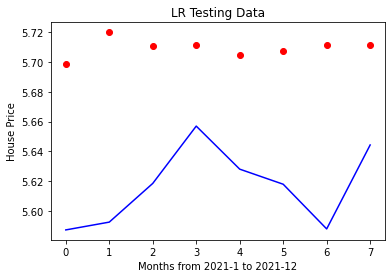

San Bernardino
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.014725311758499893
MSE: 0.0003284321024309216
RMSE: 0.01812269578266218
R2 Square -0.10066126883598847
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.011075135842522768
MSE: 0.00017643394732636612
RMSE: 0.013282844097796455
R2 Square 0.25767288707390634
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.014725  0.000328  0.018123  -0.100661         -9.504921


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


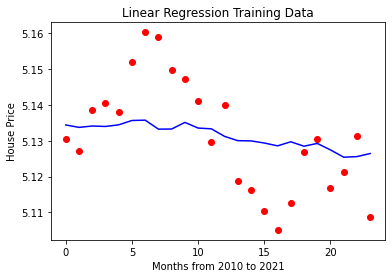

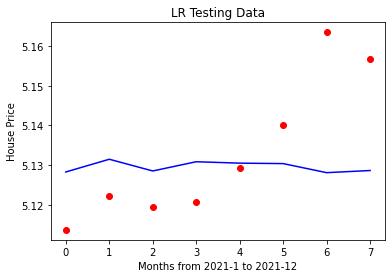

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.058136678490462
MSE: 0.0037723323924799966
RMSE: 0.06141931611862832
R2 Square -16.560900713041526
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.012269384663386562
MSE: 0.000213061927060395
RMSE: 0.014596640951273516
R2 Square 0.1596215786946793
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.058137  0.003772  0.061419 -16.560901         -8.286922


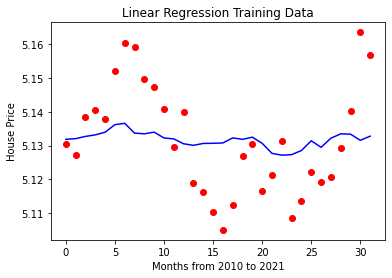

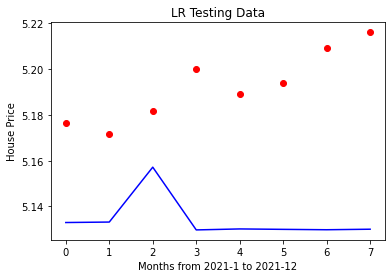

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.10170375439395485
MSE: 0.011116735196486456
RMSE: 0.10543592934330524
R2 Square -23.675744896336585
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.020419403161076866
MSE: 0.0006168791183943199
RMSE: 0.024837051322456134
R2 Square 0.25827134931004003
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.101704  0.011117  0.105436 -23.675745         -29.83434


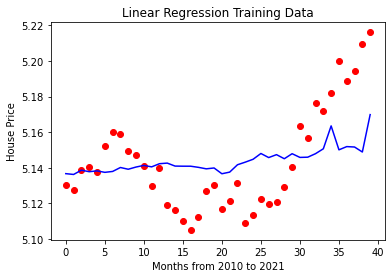

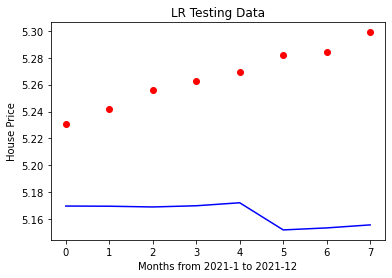

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.11208131389547926
MSE: 0.013070174422176173
RMSE: 0.11432486353447431
R2 Square -21.73986581825346
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.030419301959313194
MSE: 0.0015985813837667195
RMSE: 0.03998226336473111
R2 Square 0.4352836857371628
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.112081  0.01307  0.114325 -21.739866        -63.015323


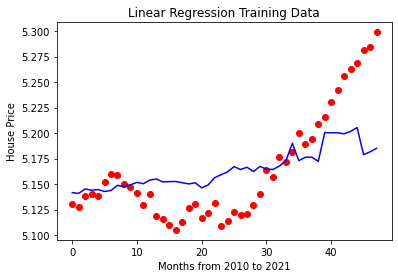

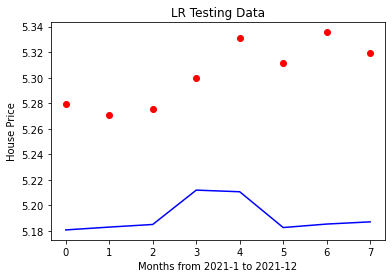

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.1026008757096919
MSE: 0.010690670349246726
RMSE: 0.1033956979242692
R2 Square -170.49473093888338
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03922770986714116
MSE: 0.002440807957105321
RMSE: 0.049404533770751456
R2 Square 0.49785275208039015
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.102601  0.010691  0.103396 -170.494731        -45.567665


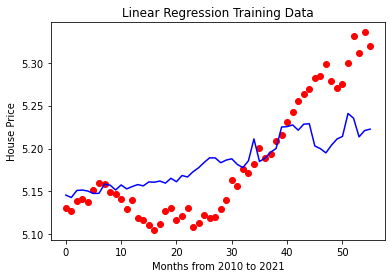

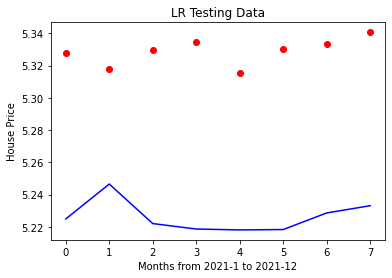

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.09359417286607552
MSE: 0.008941878438455375
RMSE: 0.09456150611350993
R2 Square -140.21160592572676
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.045654642125238884
MSE: 0.0028785262308899506
RMSE: 0.05365189866994411
R2 Square 0.560878562088182
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.093594  0.008942  0.094562 -140.211606        -49.831201


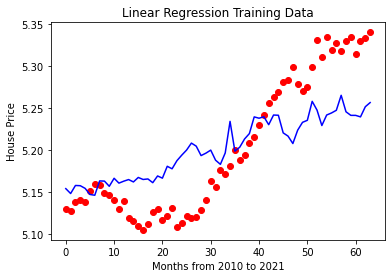

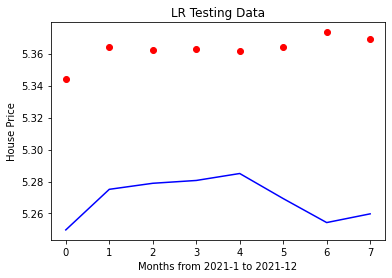

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.09495959526991637
MSE: 0.009175414119066635
RMSE: 0.09578838196288021
R2 Square -64.94651843790759
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.048706057084274335
MSE: 0.0030848035490827212
RMSE: 0.05554100781479142
R2 Square 0.6319329751070724
__________________________________
   Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.09496  0.009175  0.095788 -64.946518        -34.004907


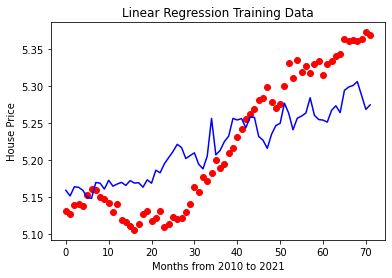

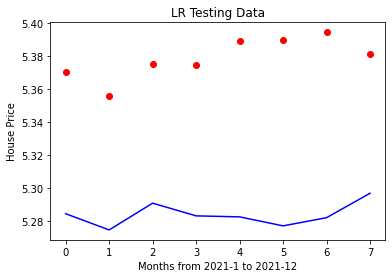

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.10223193506589057
MSE: 0.01114362681506345
RMSE: 0.10556337819084538
R2 Square -90.73250143233855
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05090035026770647
MSE: 0.0032984918537568527
RMSE: 0.05743249823712053
R2 Square 0.6643457409082806
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.102232  0.011144  0.105563 -90.732501        -22.175047


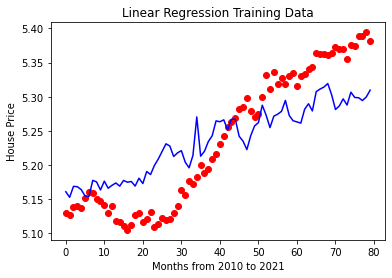

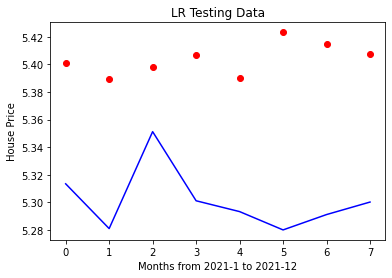

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.10870318268981904
MSE: 0.011893135345789022
RMSE: 0.10905565251645154
R2 Square -219.0348753255725
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.053618712277202225
MSE: 0.003552756475690437
RMSE: 0.059605003780642755
R2 Square 0.6849189989910006
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.108703  0.011893  0.109056 -219.034875        -15.949402


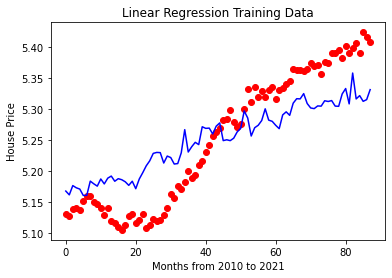

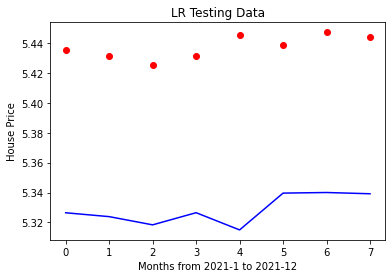

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.08212531123561018
MSE: 0.00683250119272695
RMSE: 0.08265894502548983
R2 Square -77.2046116205624
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05589255098071111
MSE: 0.003708227324832211
RMSE: 0.06089521594371935
R2 Square 0.7145258044709797
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.082125  0.006833  0.082659 -77.204612        -12.934397


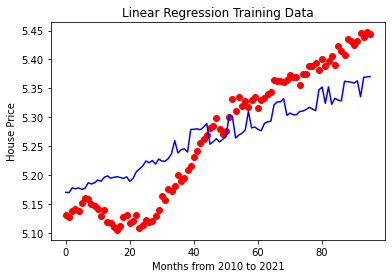

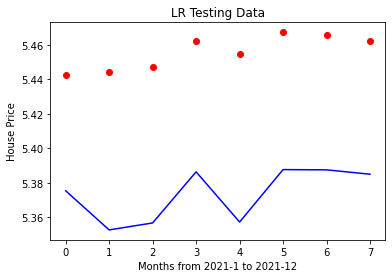

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.08235510892956688
MSE: 0.007111348127493013
RMSE: 0.08432880959371485
R2 Square -75.72446536865056
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05618400235582559
MSE: 0.0037698358968432837
RMSE: 0.06139898937965741
R2 Square 0.740665117513809
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.082355  0.007111  0.084329 -75.724465         -9.

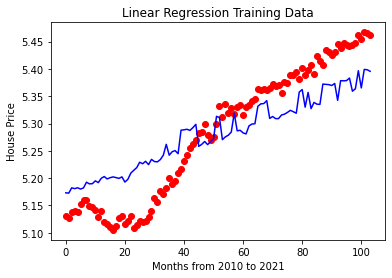

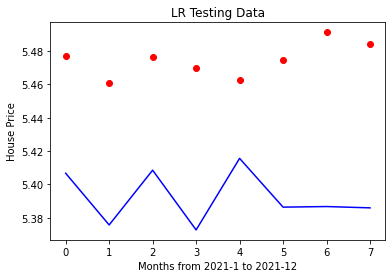

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.0761233137469659
MSE: 0.006034517251999059
RMSE: 0.07768215529965077
R2 Square -338.5334331923985
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05617293928994488
MSE: 0.003829838157768231
RMSE: 0.06188568621069198
R2 Square 0.7604324635223804
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.076123  0.006035

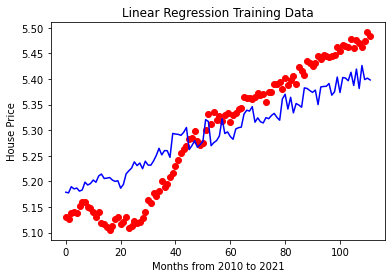

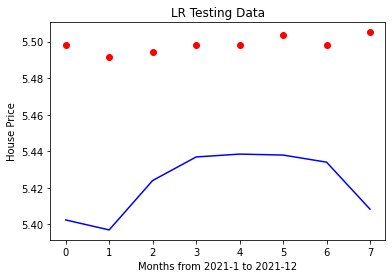

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.09613876452832548
MSE: 0.009697774880938679
RMSE: 0.09847728103953053
R2 Square -38.34099582537725
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05603490013328521
MSE: 0.003868738310157626
RMSE: 0.06219918255216564
R2 Square 0.7789070212041119
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validat

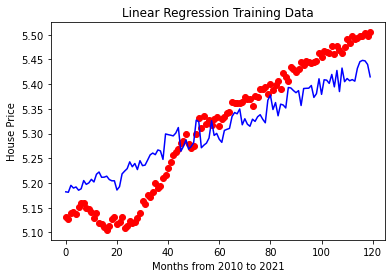

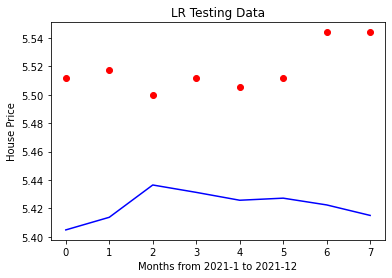

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.1279518990258136
MSE: 0.02072744212459128
RMSE: 0.14397028208832294
R2 Square -56.403488771264826
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.055742545059089245
MSE: 0.003935823706445292
RMSE: 0.06273614354138524
R2 Square 0.792810002522962
__________________________________
   Model       MAE       MSE    

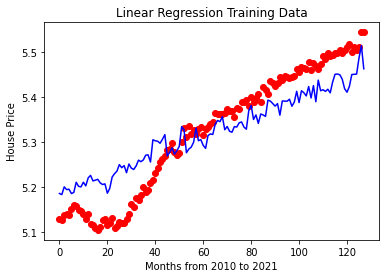

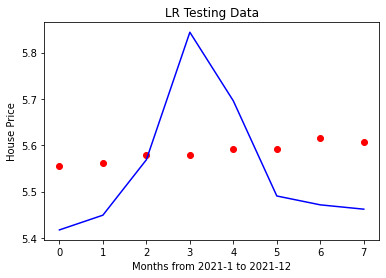

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.15646207054143924
MSE: 0.024560279689749498
RMSE: 0.15671719653487137
R2 Square -144.69104142337727
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.055465085908390714
MSE: 0.004224467093231858
RMSE: 0.06499590058789753
R2 Square 0.8057112447813365
________________________________

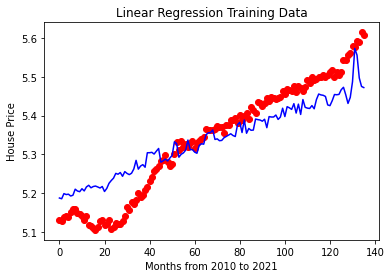

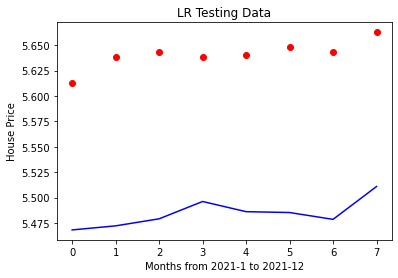

San Diego
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.015499832837381544
MSE: 0.00027463050378544055
RMSE: 0.016571979476979828
R2 Square -0.005491142465712695
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.009377181032322213
MSE: 0.00012074897809568627
RMSE: 0.010988583989563271
R2 Square 0.31889732391648673
__________________________________
   Model     MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.0155  0.000275  0.016572  -0.005491        -12.187905


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


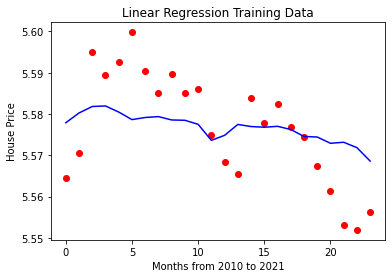

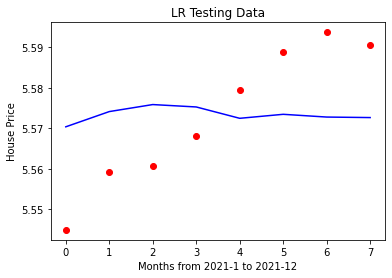

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.043036215144410805
MSE: 0.002273341364061858
RMSE: 0.047679569671525535
R2 Square -4.247220175631937
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.010892066240282827
MSE: 0.00015813277399779756
RMSE: 0.012575085446938226
R2 Square 0.22335973936128484
__________________________________
   Model       MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.043036  0.002273  0.04768   -4.24722        -29.465162


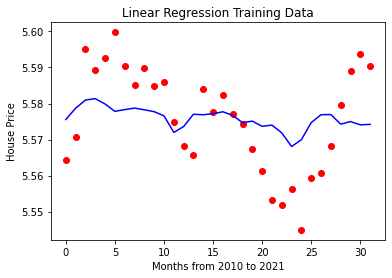

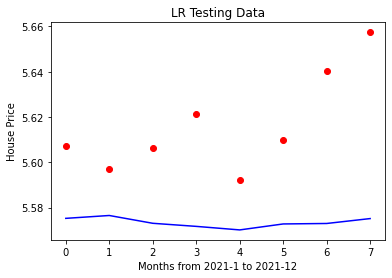

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.09101158346531324
MSE: 0.008305931040225801
RMSE: 0.0911368807905219
R2 Square -273.521949954495
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.015036885951410972
MSE: 0.00042158291658266013
RMSE: 0.020532484423046816
R2 Square 0.17836027606552096
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.091012  0.008306  0.091137 -273.52195         -5.967718


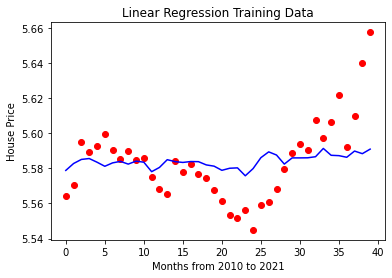

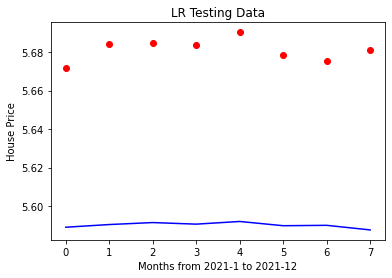

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.06892892999866573
MSE: 0.005057385867580125
RMSE: 0.07111529981361342
R2 Square -18.69401334608104
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.024265942522424016
MSE: 0.000989108218385804
RMSE: 0.03145009091220253
R2 Square 0.43263473540609676
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.068929  0.005057  0.071115 -18.694013        -18.201495


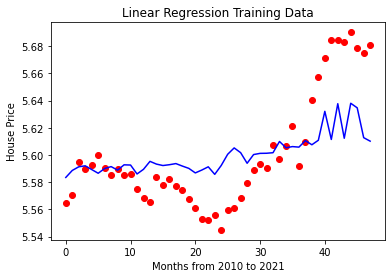

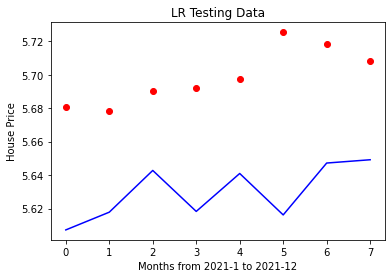

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.06268729119669536
MSE: 0.004126627963249885
RMSE: 0.06423883531984281
R2 Square -21.403693087129124
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03012800131962182
MSE: 0.0012652281925211292
RMSE: 0.035570046282246096
R2 Square 0.5353755121696657
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.062687  0.004127  0.064239 -21.403693        -15.984705


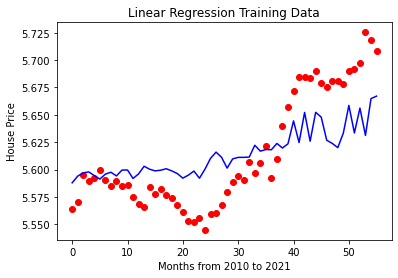

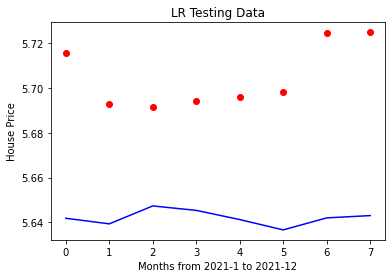

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.057718554528204735
MSE: 0.0034004954057754587
RMSE: 0.058313766863198425
R2 Square -24.37580978116381
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03334719267813459
MSE: 0.0013926926404528956
RMSE: 0.037318797414344636
R2 Square 0.5780384460844196
__________________________________
   Model       MAE     MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.057719  0.0034  0.058314  -24.37581        -11.173533


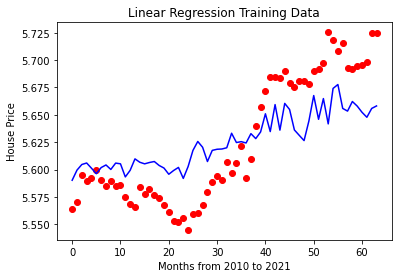

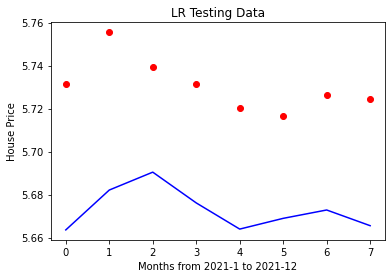

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.05048667401307394
MSE: 0.0026059535701385525
RMSE: 0.0510485413125444
R2 Square -17.8300476938788
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03424287560357304
MSE: 0.0014258450746440997
RMSE: 0.03776036380444579
R2 Square 0.6469216613363868
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.050487  0.002606  0.051049 -17.830048         -6.184083


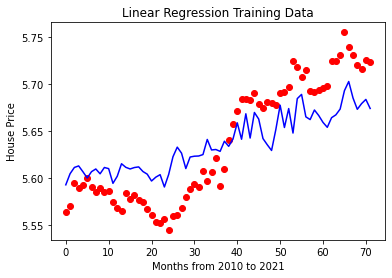

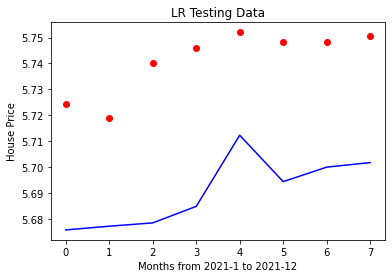

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.049917411933938616
MSE: 0.0027206464899211863
RMSE: 0.052159816812573125
R2 Square -33.75166260809878
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.034399262612398264
MSE: 0.001430798856633779
RMSE: 0.03782590192756518
R2 Square 0.6901395011288809
__________________________________
   Model       MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.049917  0.002721  0.05216 -33.751663         -4.463753


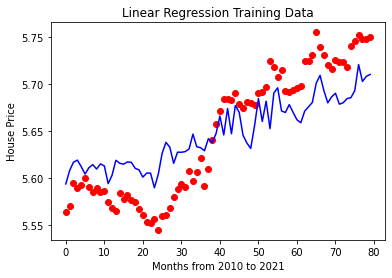

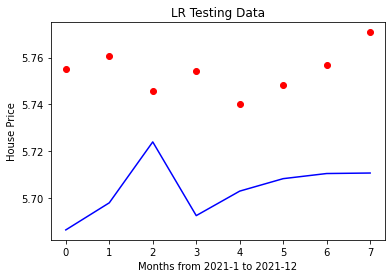

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.05684272295936499
MSE: 0.003377080290571699
RMSE: 0.058112651725521
R2 Square -215.1370814809184
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03436177624675078
MSE: 0.0014569337368479803
RMSE: 0.038169801372917575
R2 Square 0.7165587677652802
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.056843  0.003377  0.058113 -215.137081         -4.912491


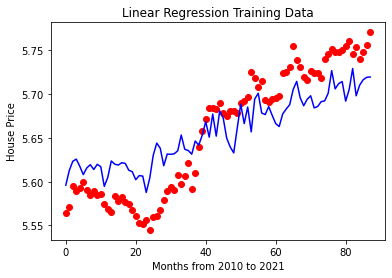

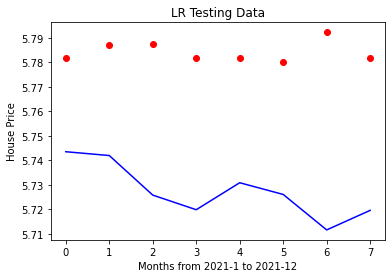

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.05722841719436067
MSE: 0.0035302978654235236
RMSE: 0.05941630975938782
R2 Square -13.428512402322848
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03418054492546258
MSE: 0.0014902383654032461
RMSE: 0.03860360560107367
R2 Square 0.7493241032143334
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.057228  0.00353  0.059416 -13.428512         -7.070258


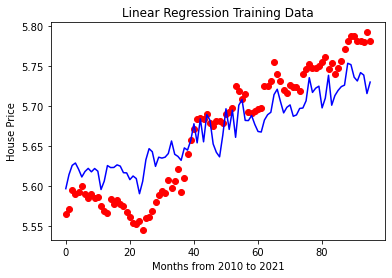

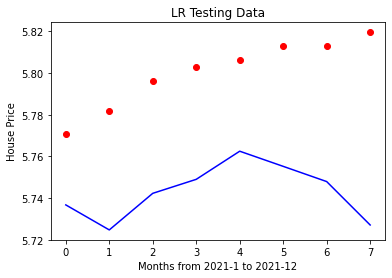

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.05687597812406531
MSE: 0.003620160943353065
RMSE: 0.060167773295619516
R2 Square -55.150871047241694
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.034490770330951374
MSE: 0.0015355192512559515
RMSE: 0.039185702127892914
R2 Square 0.7726088997867463
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.056876  0.00362  0.060168 -55.150871         

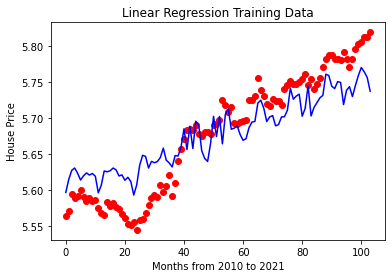

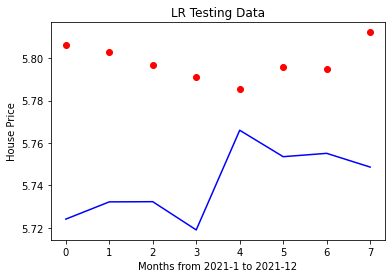

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.04526064153565179
MSE: 0.0023048452829700005
RMSE: 0.04800880422349635
R2 Square -86.85264305914612
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03474526248297375
MSE: 0.00160543785102279
RMSE: 0.04006791548137724
R2 Square 0.7780123570254296
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.045261  0.002305

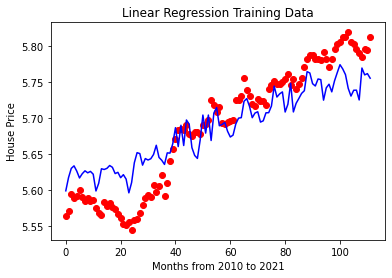

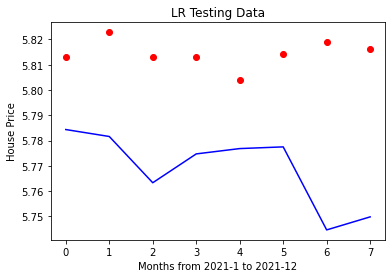

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.07062473992561835
MSE: 0.005407780348292212
RMSE: 0.07353761179350476
R2 Square -19.239274354080038
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03474026223322123
MSE: 0.0016243597502797213
RMSE: 0.040303346638706335
R2 Square 0.7908444493779645
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Vali

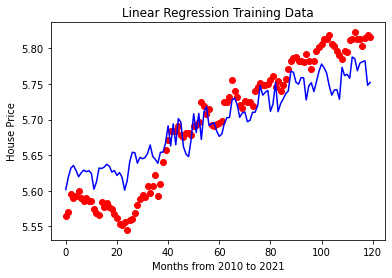

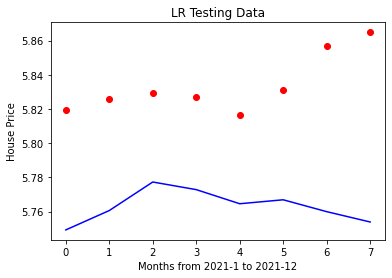

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.15086924080967
MSE: 0.04373280624876236
RMSE: 0.20912390166779682
R2 Square -125.26996408831639
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03467284905647469
MSE: 0.0016585028036494177
RMSE: 0.04072471981056982
R2 Square 0.8031223220013447
__________________________________
   Model       MAE       MSE     

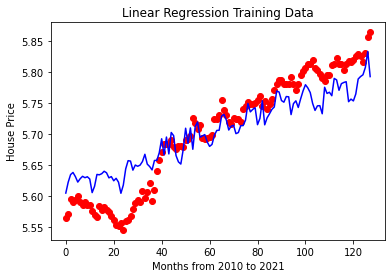

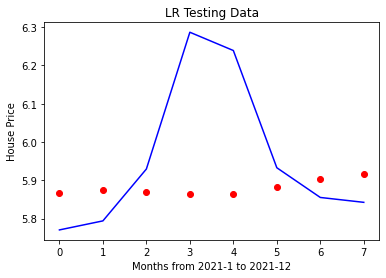

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.0996243937379856
MSE: 0.010652890242842626
RMSE: 0.10321283952514157
R2 Square -445.20265337309917
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03522120137144663
MSE: 0.0018915154999736834
RMSE: 0.043491556651535056
R2 Square 0.8043234591871912
________________________________

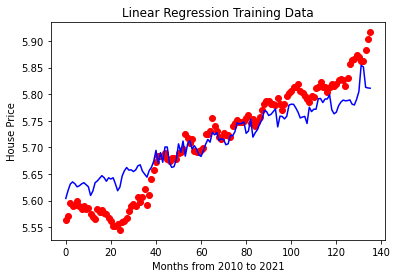

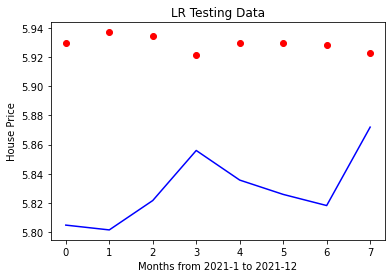

San Francisco
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.035778439103996806
MSE: 0.0014306246492599825
RMSE: 0.03782359910505586
R2 Square -0.1828622680871388
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.02278621590605597
MSE: 0.0008112590501289643
RMSE: 0.028482609608829108
R2 Square 0.12115929696329764
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.035778  0.001431  0.037824  -0.182862        -15.832816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


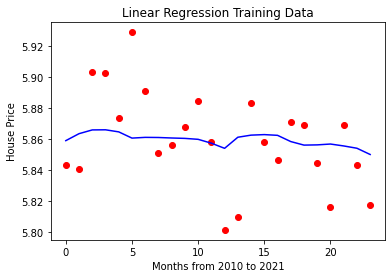

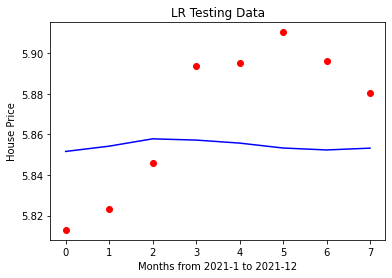

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.06791000624924148
MSE: 0.0063322073428654915
RMSE: 0.07957516787833684
R2 Square -2.0877218286768153
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.02553043230830271
MSE: 0.0009303460005651709
RMSE: 0.030501573739156
R2 Square 0.08301926050102448
__________________________________
   Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.06791  0.006332  0.079575  -2.087722        -14.074479


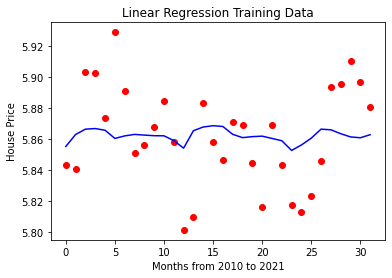

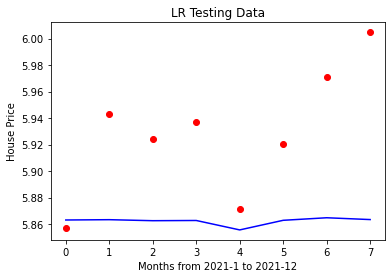

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.09550057989728755
MSE: 0.009347018840957809
RMSE: 0.09667998159369813
R2 Square -39.11082633363827
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.030766421931012356
MSE: 0.0015887022923926765
RMSE: 0.03985852847751252
R2 Square 0.1772229958577073
__________________________________
   Model       MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.095501  0.009347  0.09668 -39.110826          -1.89966


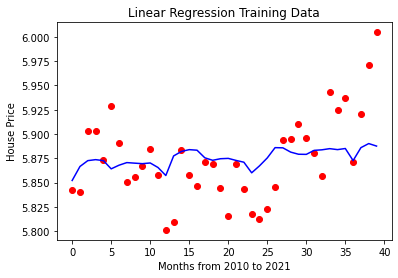

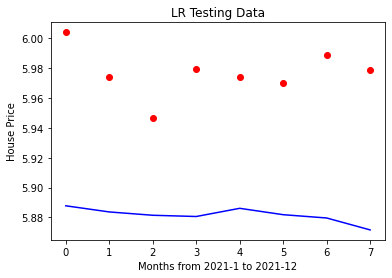

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.10489371393507219
MSE: 0.012408635650537406
RMSE: 0.11139405572353224
R2 Square -6.8559459258707465
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0398803677428203
MSE: 0.0022952648197412393
RMSE: 0.04790892213086451
R2 Square 0.25567894947382397
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.104894  0.012409  0.111394  -6.855946         -8.897505


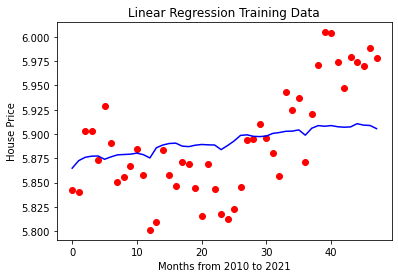

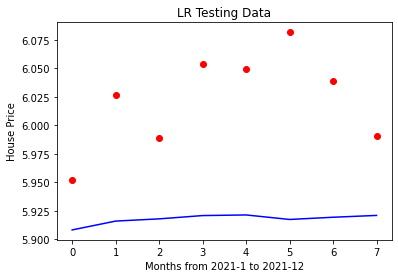

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.11184773415090876
MSE: 0.013676969131619204
RMSE: 0.11694857473102956
R2 Square -6.845116379016286
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.046105701810237765
MSE: 0.003026224220014578
RMSE: 0.0550111281470811
R2 Square 0.38905160664760485
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.111848  0.013677  0.116949  -6.845116         -3.041042


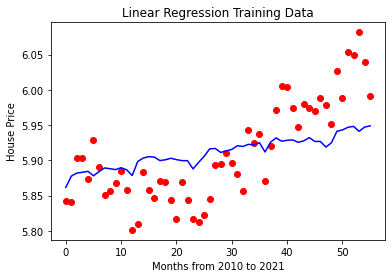

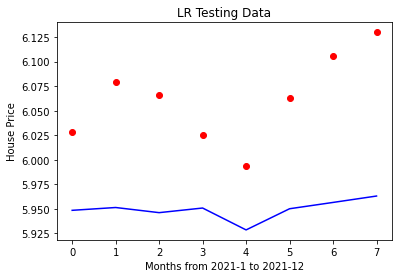

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.11527629697473307
MSE: 0.013677560672599773
RMSE: 0.11695110376819781
R2 Square -33.71114482760655
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05080486635840464
MSE: 0.003649039507210831
RMSE: 0.06040728025007276
R2 Square 0.48049537747382187
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.115276  0.013678  0.116951 -33.711145         -2.298416


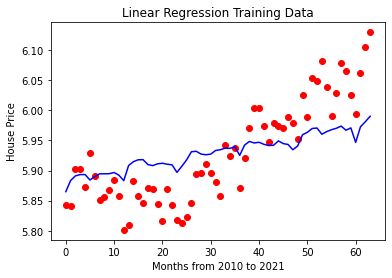

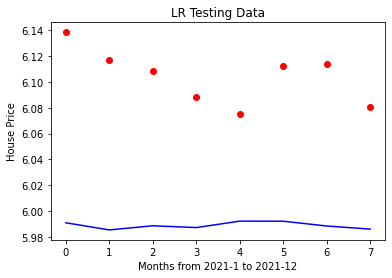

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.1025823823160884
MSE: 0.011177178949805121
RMSE: 0.10572217813592909
R2 Square -15.050687632322
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05427344300675515
MSE: 0.004059992557996868
RMSE: 0.0637180708904222
R2 Square 0.5632412700320582
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.102582  0.011177  0.105722 -15.050688         -2.187383


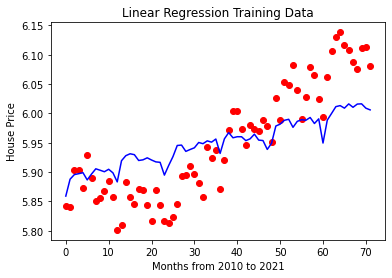

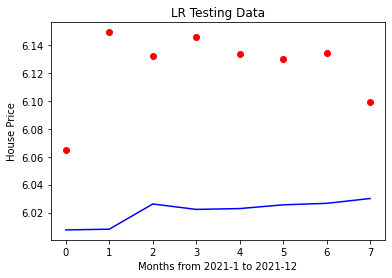

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.06779043530542839
MSE: 0.005006753414432828
RMSE: 0.0707584158558742
R2 Square -9.774549909693595
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05654870483126515
MSE: 0.00431500396631011
RMSE: 0.06568868978987258
R2 Square 0.613974008874064
__________________________________
   Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.06779  0.005007  0.070758   -9.77455         -1.681844


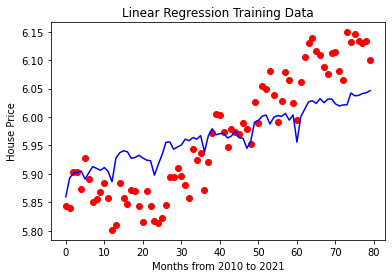

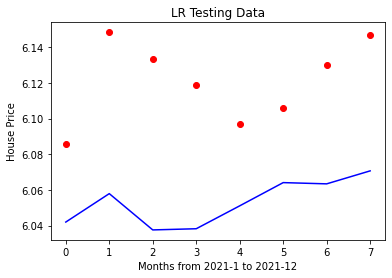

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.10924429181918138
MSE: 0.012561143113166931
RMSE: 0.11207650562525105
R2 Square -26.78152211179826
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.057121687801393796
MSE: 0.00428041765145119
RMSE: 0.0654249008516726
R2 Square 0.6483291166893334
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.109244  0.012561  0.112077 -26.781522         -2.618706


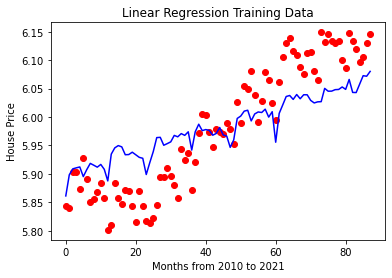

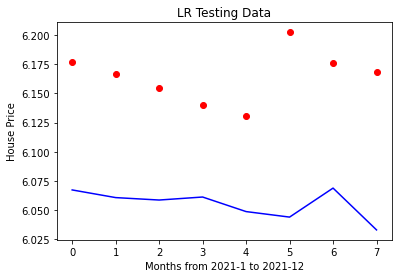

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.10560980651527174
MSE: 0.011810046036787791
RMSE: 0.10867403570673076
R2 Square -9.924806263849046
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0586664226590082
MSE: 0.004561019937305279
RMSE: 0.06753532362627189
R2 Square 0.6689592241581139
__________________________________
   Model      MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.10561  0.01181  0.108674  -9.924806         -1.469662


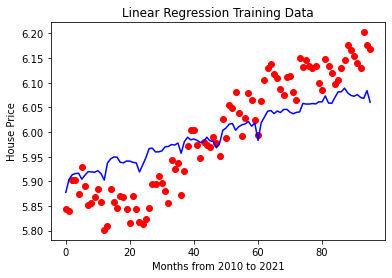

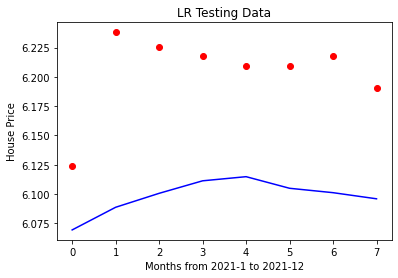

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.061556120745780984
MSE: 0.004568728495673994
RMSE: 0.06759237009954595
R2 Square -6.406795603738254
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0593090824089004
MSE: 0.004748812512846088
RMSE: 0.06891162828468131
R2 Square 0.7008315161536676
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.061556  0.004569  0.067592  -6.406796         -1.

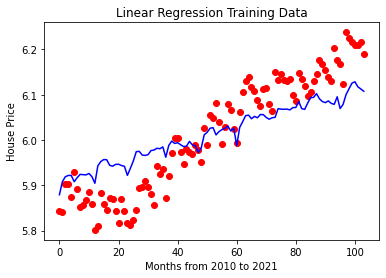

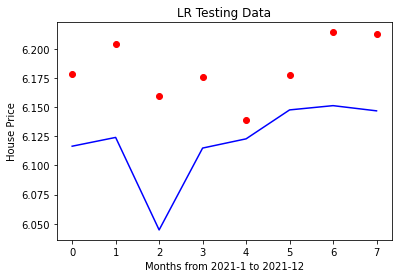

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.06167098586133357
MSE: 0.0044184876089792425
RMSE: 0.06647170532624572
R2 Square -6.620223726883415
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.059352669158007056
MSE: 0.004758307360134244
RMSE: 0.06898048535734033
R2 Square 0.7153416684026727
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.061671  0.0044

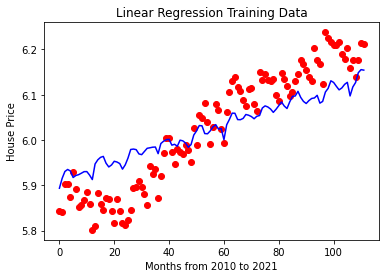

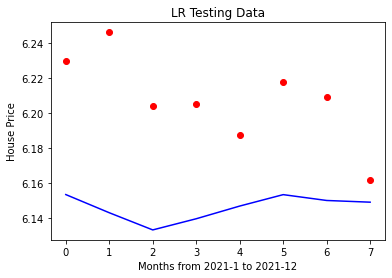

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.046602376709529714
MSE: 0.0026813127164893222
RMSE: 0.05178139353560623
R2 Square -3.5879659522019702
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.059153167189223026
MSE: 0.00476048359797738
RMSE: 0.0689962578548821
R2 Square 0.7315580553256205
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Valid

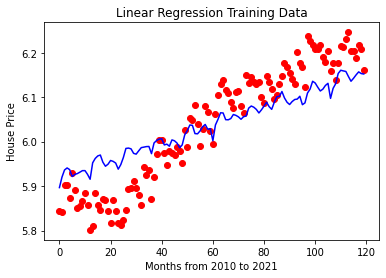

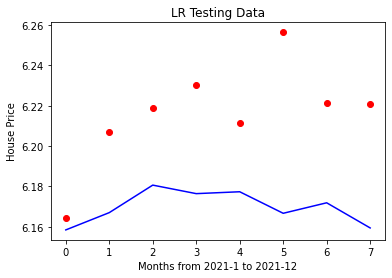

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.03114715179540284
MSE: 0.001193696365964642
RMSE: 0.034549911229475566
R2 Square -2.443664442437612
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05862137742793999
MSE: 0.0047705410522967786
RMSE: 0.06906910345658744
R2 Square 0.7429627394126017
__________________________________
   Model       MAE       MSE 

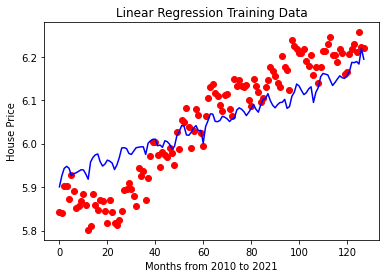

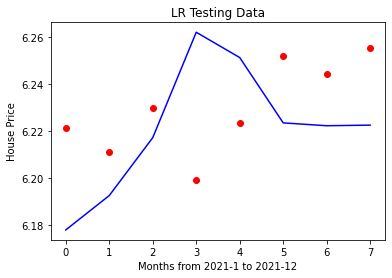

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.06034975619663785
MSE: 0.004296206635609529
RMSE: 0.06554545472883325
R2 Square -10.883004570798684
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05845597234475346
MSE: 0.0047787878278411295
RMSE: 0.06912877713254538
R2 Square 0.7526493912631773
________________________________

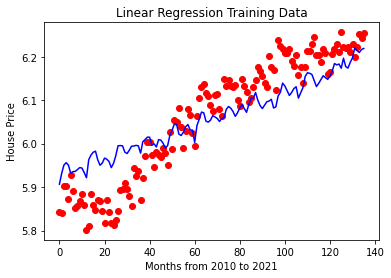

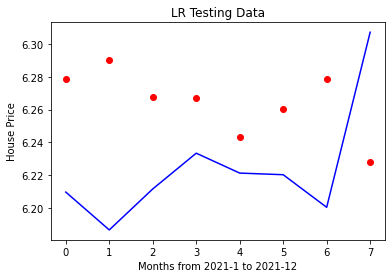

Santa Barbara
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.07657179511921164
MSE: 0.0072508064500124945
RMSE: 0.08515166733548142
R2 Square -0.25268744598625625
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.040372754317480775
MSE: 0.0024046138608049025
RMSE: 0.04903686226508485
R2 Square 0.14544035785877418
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.076572  0.007251  0.085152  -0.252687     -11651.380188


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


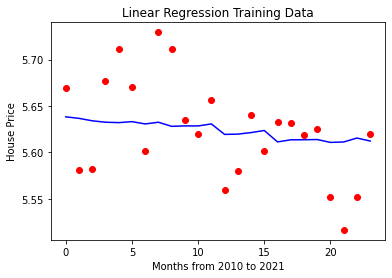

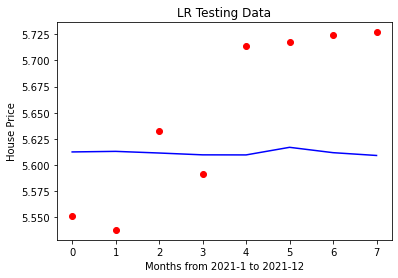

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.10562049242829752
MSE: 0.013699499327936076
RMSE: 0.1170448603225963
R2 Square -3.3409955770523947
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.048053530903490876
MSE: 0.0033871926497879338
RMSE: 0.05819959320981491
R2 Square 0.0800504013184441
__________________________________
   Model      MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.10562  0.013699  0.117045  -3.340996       -105.515178


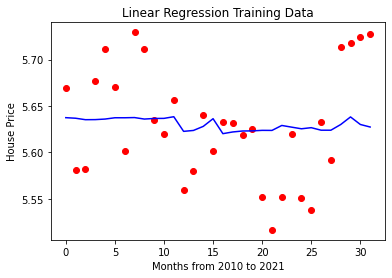

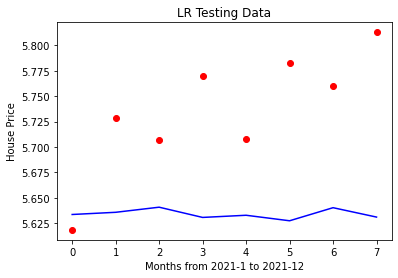

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.13336125249636466
MSE: 0.018594441168599835
RMSE: 0.13636143578226154
R2 Square -21.15932140773532
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.056043206294784695
MSE: 0.004465177722212808
RMSE: 0.06682198532079699
R2 Square 0.1670471678707468
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.133361  0.018594  0.136361 -21.159321        -27.227385


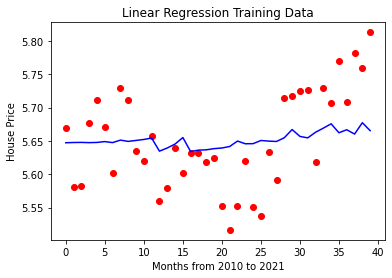

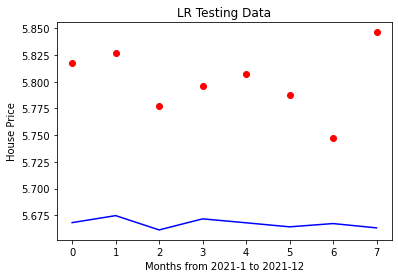

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.12486280204831945
MSE: 0.016572438770128692
RMSE: 0.12873398451896334
R2 Square -11.547279566163331
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0638099325967663
MSE: 0.005501362653295661
RMSE: 0.07417117130864026
R2 Square 0.2855493108135232
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.124863  0.016572  0.128734  -11.54728          -5.47905


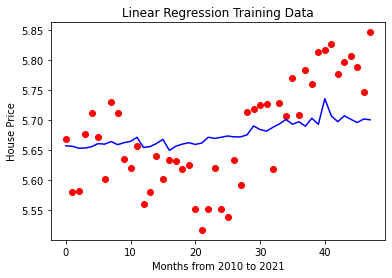

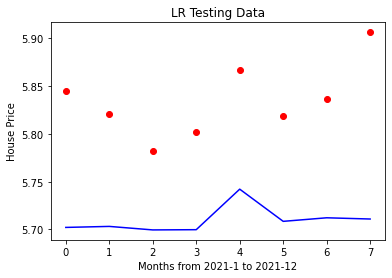

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.07599769792240862
MSE: 0.008293341625183099
RMSE: 0.09106778588053571
R2 Square -2.026845161144263
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06766671831747183
MSE: 0.006226313976372128
RMSE: 0.07890699573784397
R2 Square 0.3685001812288694
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.075998  0.008293  0.091068  -2.026845         -1.303417


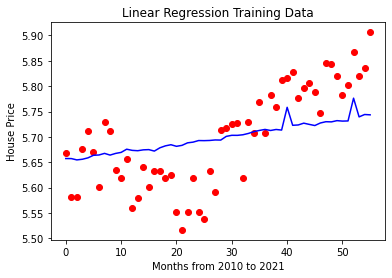

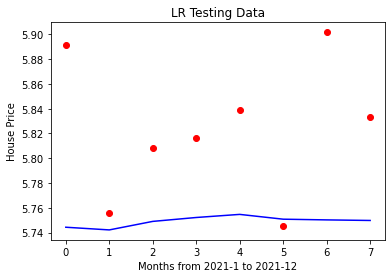

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.05841302812519433
MSE: 0.005429682882496845
RMSE: 0.07368638193382034
R2 Square -2.868685481848175
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06616057334449545
MSE: 0.006290908729840755
RMSE: 0.07931524903724854
R2 Square 0.4108438813915244
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.058413  0.00543  0.073686  -2.868685          -1.64583


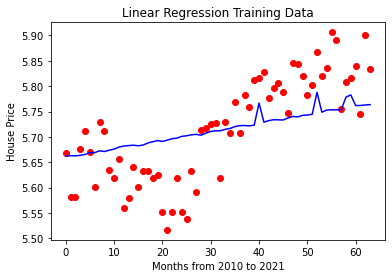

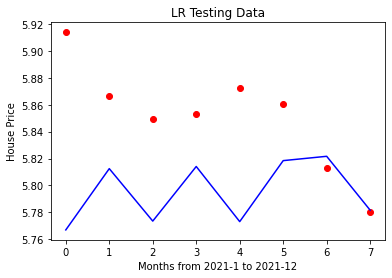

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.058031569941001004
MSE: 0.003634495589723104
RMSE: 0.06028677790132015
R2 Square -0.5927574437443393
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06470346849714101
MSE: 0.006256183729634968
RMSE: 0.079096041175491
R2 Square 0.455389889828116
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.058032  0.003634  0.060287  -0.592757         -2.088582


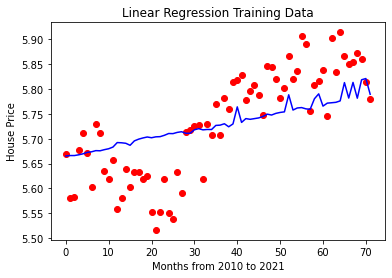

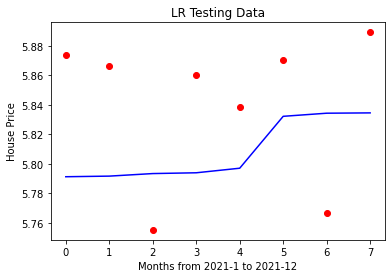

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.059087653687751374
MSE: 0.00421245388614416
RMSE: 0.06490341967989176
R2 Square -0.3764079623410588
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06449171759448796
MSE: 0.006174167565999847
RMSE: 0.07857587139828516
R2 Square 0.47053547529103246
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.059088  0.004212  0.064903  -0.376408          -1.42465


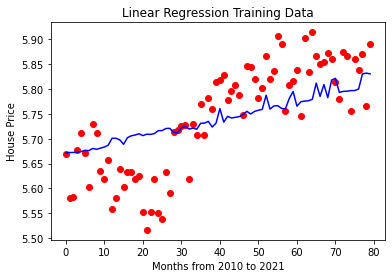

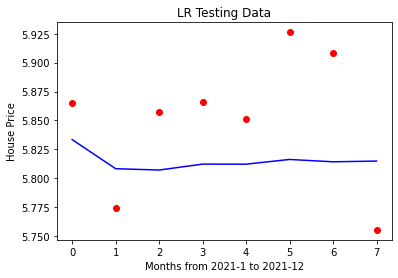

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.030182759999019093
MSE: 0.001443073927651027
RMSE: 0.03798781288322647
R2 Square -0.2644769987045512
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06415002760122235
MSE: 0.006087377664452841
RMSE: 0.07802164869094246
R2 Square 0.4873595775660343
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.030183  0.001443  0.037988  -0.264477         -1.897681


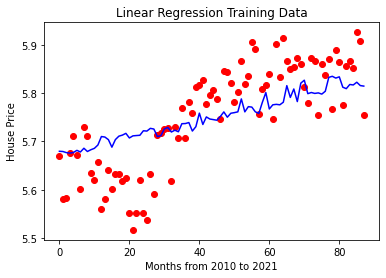

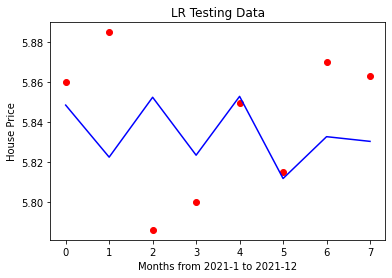

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.06086933428807684
MSE: 0.005358491941034259
RMSE: 0.07320172088847543
R2 Square -0.9915825293120939
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06243341027834066
MSE: 0.005945308192084934
RMSE: 0.07710582463137874
R2 Square 0.48771368941775683
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.060869  0.005358  0.073202  -0.991583         -1.900899


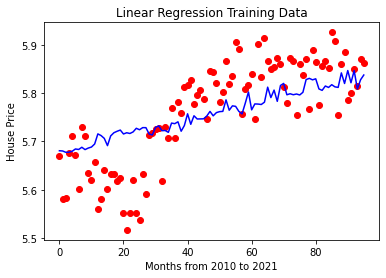

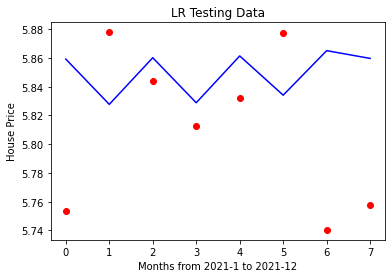

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.04945191848457864
MSE: 0.003950459736931126
RMSE: 0.06285268281411006
R2 Square -0.11957603530881444
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06416965957476822
MSE: 0.006200594328108706
RMSE: 0.07874385263694371
R2 Square 0.44264025177250865
__________________________________
   Model       MAE      MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.049452  0.00395  0.062853  -0.119576         -2

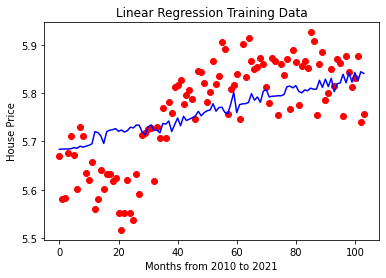

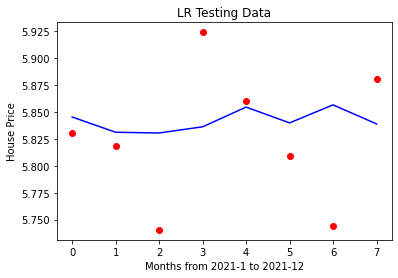

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.01995580746661707
MSE: 0.0005552198651366806
RMSE: 0.023563103894365882
R2 Square 0.09088868830424157
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06421532374061462
MSE: 0.006244526025361942
RMSE: 0.07902231346500772
R2 Square 0.424601379968356
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.019956  0.0005

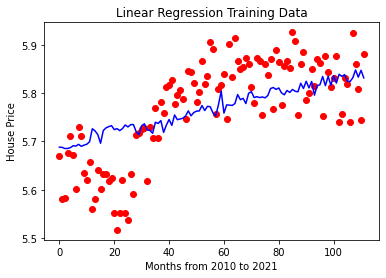

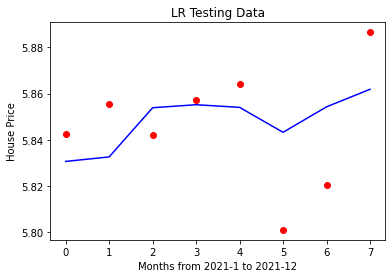

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.06216158491002188
MSE: 0.006101054970829968
RMSE: 0.0781092502257573
R2 Square -0.0600071023029054
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06186012675631734
MSE: 0.005996536310270154
RMSE: 0.07743730567543111
R2 Square 0.43218346395862517
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Valida

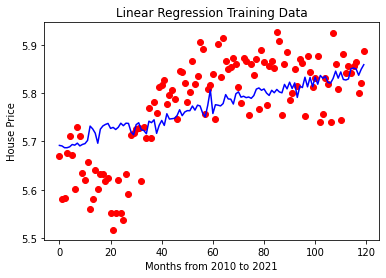

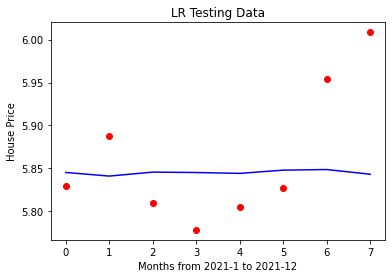

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.1261071142176745
MSE: 0.01854852693153906
RMSE: 0.13619297680695236
R2 Square -16.040110688650337
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06199842290034744
MSE: 0.006004186659519365
RMSE: 0.0774866869824705
R2 Square 0.44080710337574314
__________________________________
   Model       MAE       MSE    

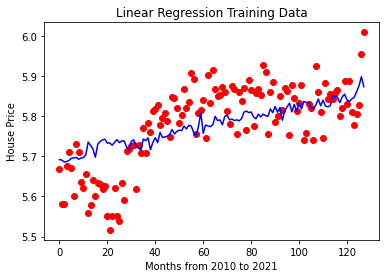

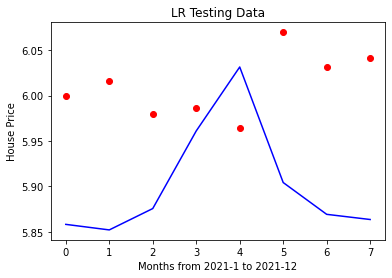

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.08931944832562022
MSE: 0.012372108795283974
RMSE: 0.11122998154851943
R2 Square -2.5076118939823058
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06331038011171997
MSE: 0.006350765732571035
RMSE: 0.07969169174117861
R2 Square 0.5182221962412168
_________________________________

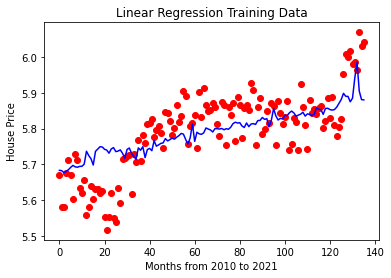

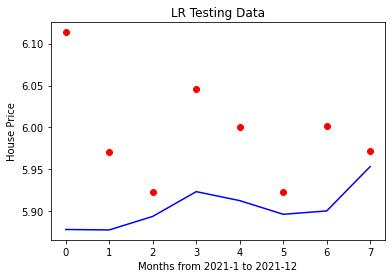

Santa Clara
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.0490003101100418
MSE: 0.0029035382246615066
RMSE: 0.05388448964833486
R2 Square -0.10500737651031544
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.021302574291472642
MSE: 0.0005792496607615786
RMSE: 0.024067606045503957
R2 Square 0.2701470851455765
__________________________________
   Model    MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.049  0.002904  0.053884  -0.105007        -60.132272


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


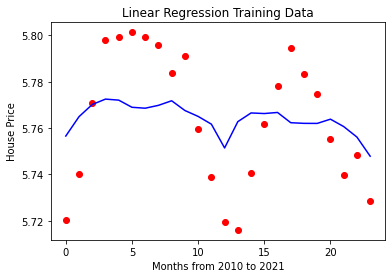

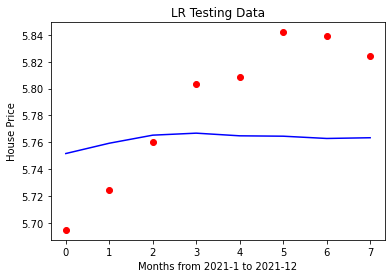

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.07134723493158746
MSE: 0.005543677044905951
RMSE: 0.07445587313910133
R2 Square -7.1703396010008085
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.026074504405469934
MSE: 0.0009535494323224808
RMSE: 0.03087959572796381
R2 Square 0.29365115411873066
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.071347  0.005544  0.074456   -7.17034        -22.631953


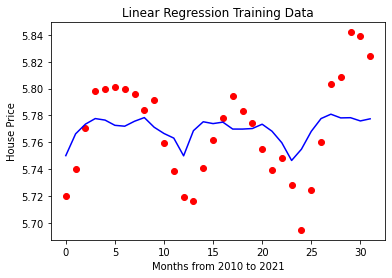

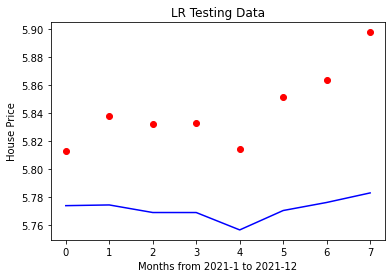

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.10372245539845126
MSE: 0.010911795811027549
RMSE: 0.10445954150305059
R2 Square -61.01971282727624
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.031320161352891396
MSE: 0.0014179167157069108
RMSE: 0.03765523490441815
R2 Square 0.31428134796907936
__________________________________
   Model       MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.103722  0.010912  0.10446 -61.019713        -18.066183


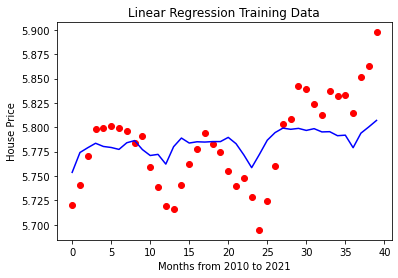

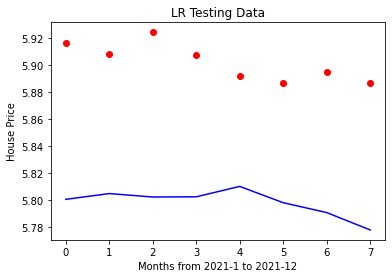

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.08361344587236874
MSE: 0.007382446609929337
RMSE: 0.08592116508712704
R2 Square -8.08979689461326
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03800102962166333
MSE: 0.0021250212238532657
RMSE: 0.046097952490899916
R2 Square 0.42127985548566316
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.083613  0.007382  0.085921  -8.089797         -6.732512


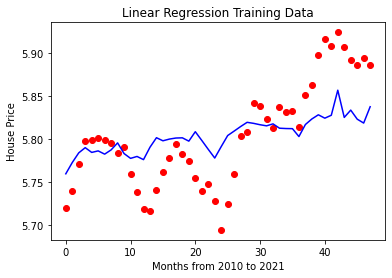

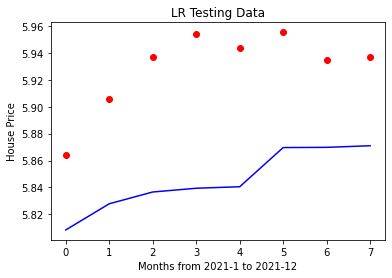

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.08558273875089206
MSE: 0.007552211095174549
RMSE: 0.08690345847648728
R2 Square -13.349872625886917
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04065210051735054
MSE: 0.0024046558292389946
RMSE: 0.049037290190619164
R2 Square 0.535511404975149
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.085583  0.007552  0.086903 -13.349873         -1.631241


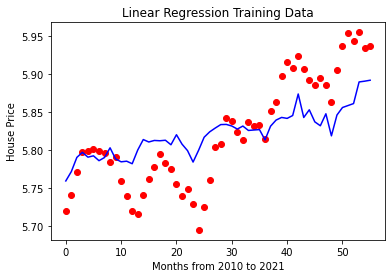

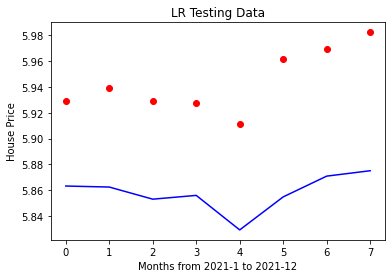

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.08228191649365879
MSE: 0.007033457804302187
RMSE: 0.08386571292430649
R2 Square -71.24044708976093
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.043329695397232595
MSE: 0.002689935058359871
RMSE: 0.05186458385410868
R2 Square 0.5676660204098793
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.082282  0.007033  0.083866 -71.240447         -1.649103


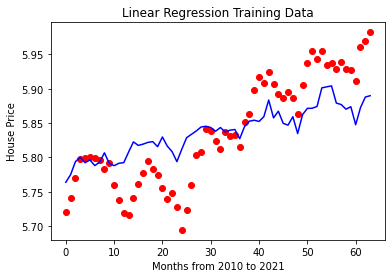

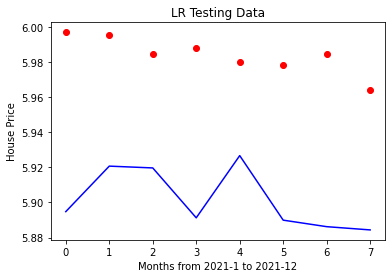

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.0842163473126899
MSE: 0.007974854707308677
RMSE: 0.08930204201085593
R2 Square -7.872549523437888
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.044821498625899854
MSE: 0.002819592353389077
RMSE: 0.05309983383579535
R2 Square 0.6324676911404443
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.084216  0.007975  0.089302   -7.87255         -1.093997


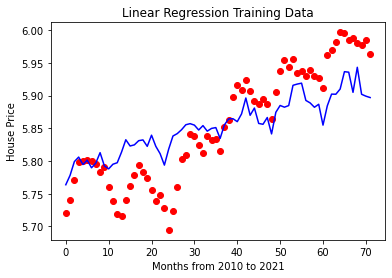

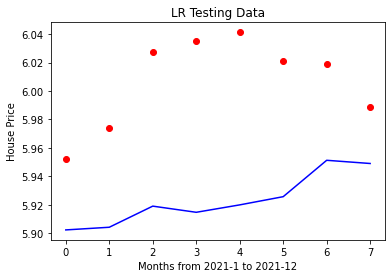

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.07373140915613696
MSE: 0.006161896764915255
RMSE: 0.0784977500627582
R2 Square -5.0620812798044375
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04603806413067089
MSE: 0.0030087687640873036
RMSE: 0.054852244840911515
R2 Square 0.6704399644041419
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.073731  0.006162  0.078498  -5.062081         -0.636481


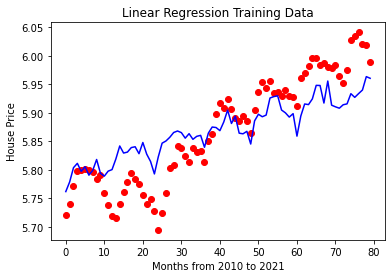

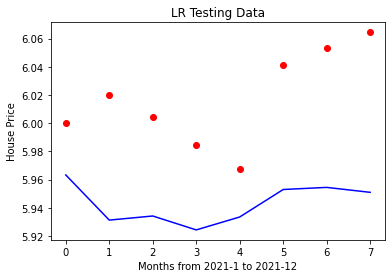

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.11610841970669272
MSE: 0.015191617810258353
RMSE: 0.12325428110316636
R2 Square -43.52859313278589
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04646374712734447
MSE: 0.0030857931133465096
RMSE: 0.0555499155116055
R2 Square 0.6976013846183693
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.116108  0.015192  0.123254 -43.528593         -0.454482


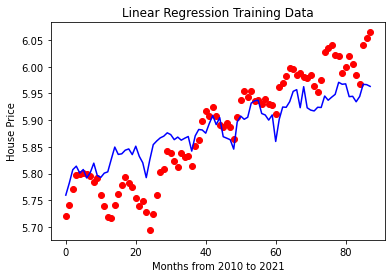

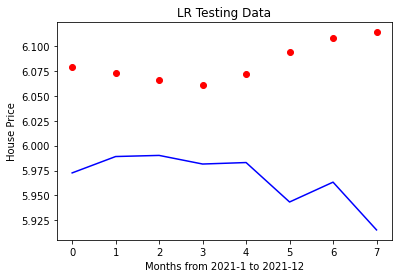

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.12811715198851592
MSE: 0.017181553094678517
RMSE: 0.1310784234520637
R2 Square -20.61401030253422
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04739932301905644
MSE: 0.003574492899461686
RMSE: 0.059787062977384044
R2 Square 0.7134019227243739
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.128117  0.017182  0.131078  -20.61401         -1.079297


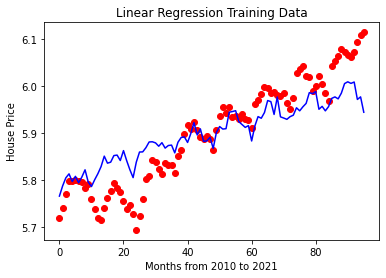

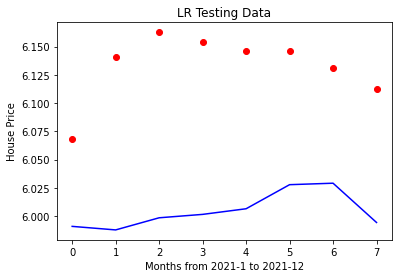

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.06744705249049165
MSE: 0.00543915612049007
RMSE: 0.07375063471245566
R2 Square -11.5053340950415
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04909561813479798
MSE: 0.0040147894812441656
RMSE: 0.06336236644289862
R2 Square 0.7401007039100007
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.067447  0.005439  0.073751 -11.505334         -0.4

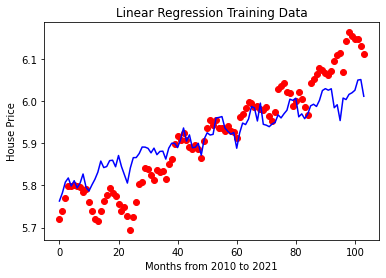

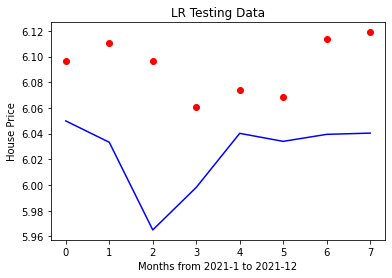

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.041496215144316895
MSE: 0.002320613203013187
RMSE: 0.048172743361917715
R2 Square -5.936404159773869
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05022321056088848
MSE: 0.004048275126679094
RMSE: 0.06362605697887536
R2 Square 0.7534162865561531
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.041496  0.0023

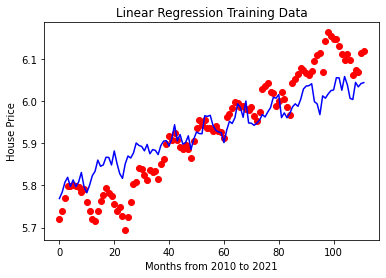

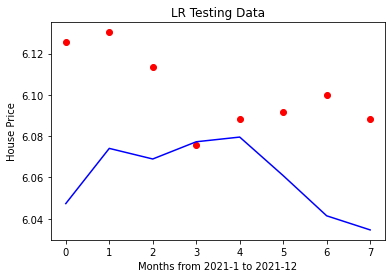

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.07680847908552402
MSE: 0.006051782637863958
RMSE: 0.07779320431672652
R2 Square -13.041567305593176
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05033548051772611
MSE: 0.004052335307507956
RMSE: 0.06365795557122422
R2 Square 0.7642135916238313
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Valida

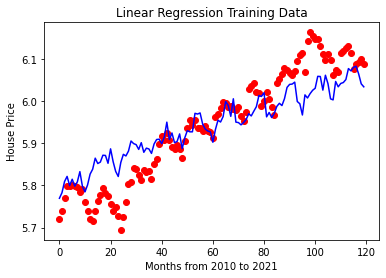

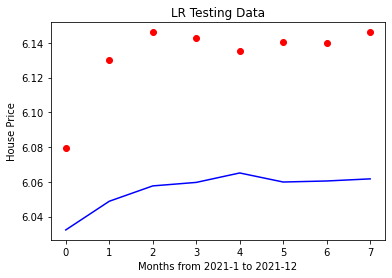

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.08888311862387377
MSE: 0.012771462986452108
RMSE: 0.11301089764466128
R2 Square -14.234956275795904
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.050543633392543766
MSE: 0.004028125743063729
RMSE: 0.06346751722782079
R2 Square 0.779734909029618
__________________________________
   Model       MAE       MSE  

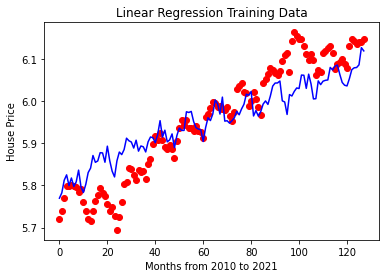

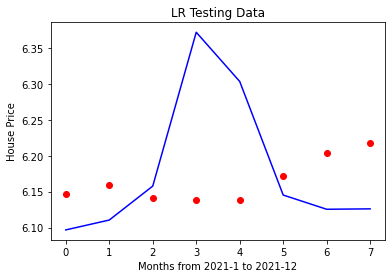

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.11401787417326859
MSE: 0.013574604858102447
RMSE: 0.1165101062487819
R2 Square -108.86270937749899
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05079566595251002
MSE: 0.004050058388029809
RMSE: 0.06364006904482276
R2 Square 0.7948458704146831
__________________________________

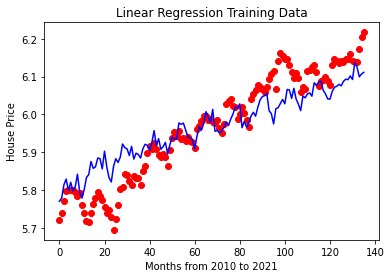

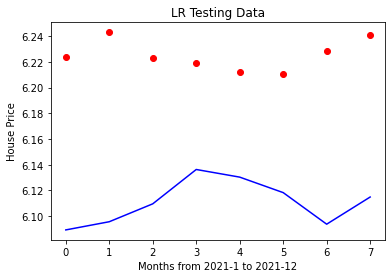

Santa Cruz
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27 28 29 30 31]
Test set evaluation:
_____________________________________
MAE: 0.030314170813184105
MSE: 0.0016460378560115404
RMSE: 0.04057139208865701
R2 Square -0.21278795594202138
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.025069360680976833
MSE: 0.0009358394091260793
RMSE: 0.030591492430512103
R2 Square 0.12531449286778684
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.030314  0.001646  0.040571  -0.212788         -8.020001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


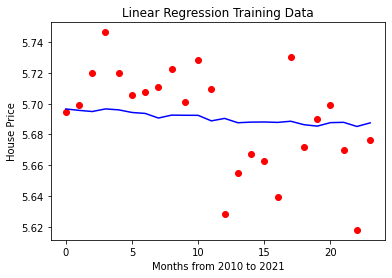

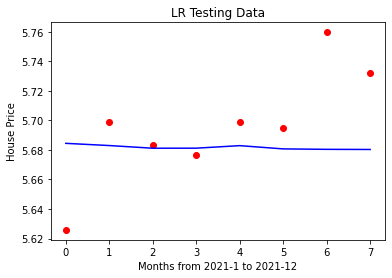

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34 35 36 37 38 39]
Test set evaluation:
_____________________________________
MAE: 0.04790807136321318
MSE: 0.0036070687713700383
RMSE: 0.060058877540044305
R2 Square -0.4759930764306932
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.02625317681352418
MSE: 0.0011226418846485432
RMSE: 0.03350584851408099
R2 Square 0.021855982817312714
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.047908  0.003607  0.060059  -0.475993         -4.483254


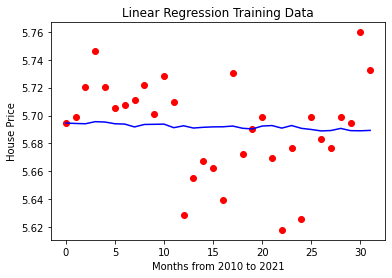

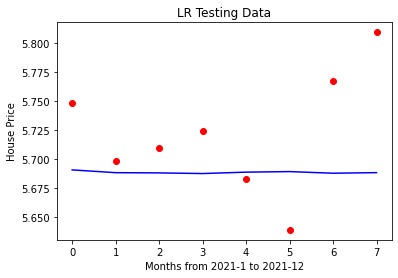

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47]
Test set evaluation:
_____________________________________
MAE: 0.09454097560526886
MSE: 0.009205525355929105
RMSE: 0.09594542905177456
R2 Square -30.010306321983542
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.029710546572590778
MSE: 0.001516567918030999
RMSE: 0.0389431369824132
R2 Square 0.024283318941928256
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.094541  0.009206  0.095945 -30.010306         -5.035503


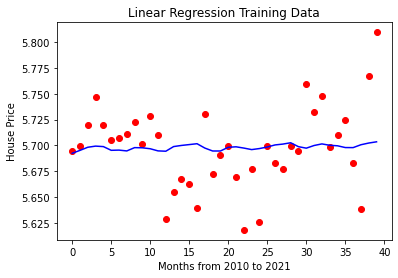

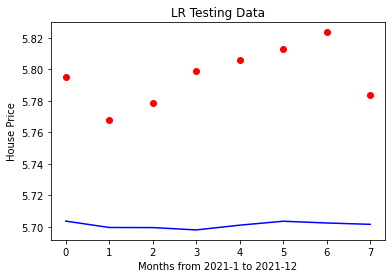

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55]
Test set evaluation:
_____________________________________
MAE: 0.08196256544121405
MSE: 0.00765671765272202
RMSE: 0.08750267226046311
R2 Square -9.189770813917239
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03781662339552089
MSE: 0.002188703987995978
RMSE: 0.04678358673718784
R2 Square 0.18042687975152316
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.081963  0.007657  0.087503  -9.189771        -12.404599


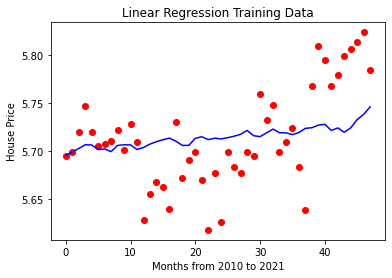

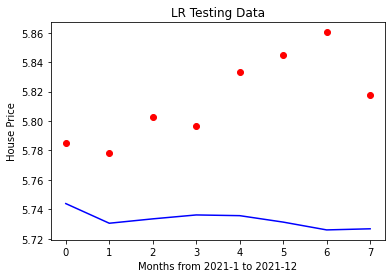

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] TEST: [56 57 58 59 60 61 62 63]
Test set evaluation:
_____________________________________
MAE: 0.08961188928388641
MSE: 0.008375884677682873
RMSE: 0.09151985947149872
R2 Square -19.875258301471057
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.041363114483345
MSE: 0.002570519627178916
RMSE: 0.05070029218040973
R2 Square 0.29274687695136825
__________________________________
   Model       MAE       MSE     RMSE  R2 Square  Cross Validation
0  Ridge  0.089612  0.008376  0.09152 -19.875258         -6.787208


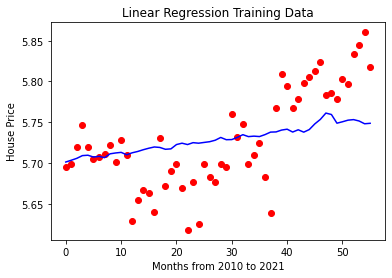

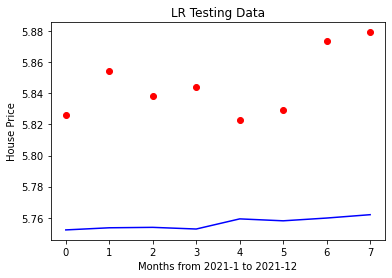

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] TEST: [64 65 66 67 68 69 70 71]
Test set evaluation:
_____________________________________
MAE: 0.07506921836143254
MSE: 0.005851185869537144
RMSE: 0.07649304458274062
R2 Square -27.886794652376434
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04419841161366253
MSE: 0.0028619115225727108
RMSE: 0.05349683656603174
R2 Square 0.3954224486440313
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.075069  0.005851  0.076493 -27.886795         -4.741109


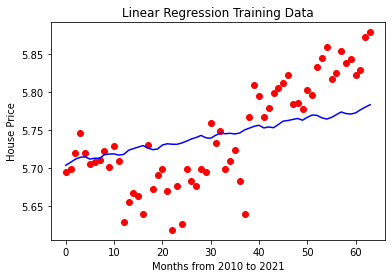

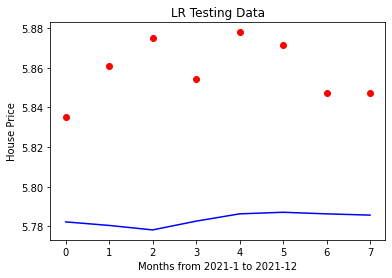

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71] TEST: [72 73 74 75 76 77 78 79]
Test set evaluation:
_____________________________________
MAE: 0.08453350594215014
MSE: 0.007526057853614461
RMSE: 0.08675285501707976
R2 Square -15.615042475318589
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04516564794187502
MSE: 0.002935156354049684
RMSE: 0.0541770832921973
R2 Square 0.470563573082607
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.084534  0.007526  0.086753 -15.615042          -4.72155


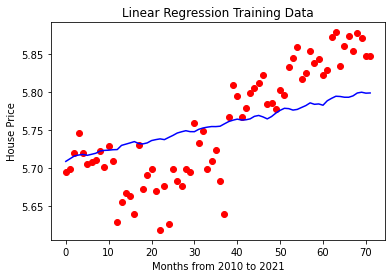

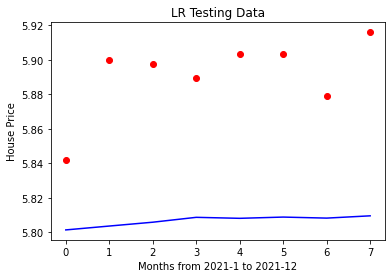

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79] TEST: [80 81 82 83 84 85 86 87]
Test set evaluation:
_____________________________________
MAE: 0.07153696290555611
MSE: 0.005134690501493996
RMSE: 0.07165675475134216
R2 Square -120.27053718189245
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.046084031701004315
MSE: 0.003086142882120237
RMSE: 0.05555306366097407
R2 Square 0.537662427090775
__________________________________
   Model       MAE       MSE      RMSE   R2 Square  Cross Validation
0  Ridge  0.071537  0.005135  0.071657 -120.270537         -3.501951


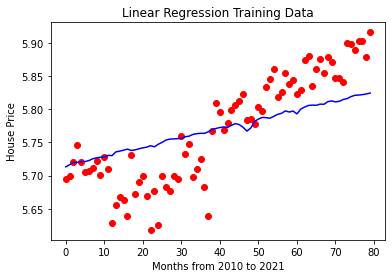

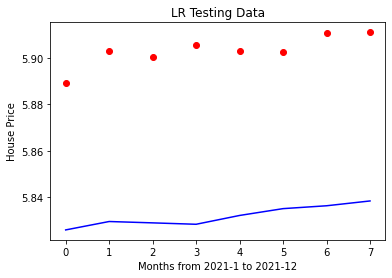

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87] TEST: [88 89 90 91 92 93 94 95]
Test set evaluation:
_____________________________________
MAE: 0.07900903548594318
MSE: 0.0063524354101078765
RMSE: 0.07970216690973889
R2 Square -52.03405254366886
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.046500384658659126
MSE: 0.003092253727754954
RMSE: 0.05560803653928948
R2 Square 0.590162158789894
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.079009  0.006352  0.079702 -52.034053         -4.121174


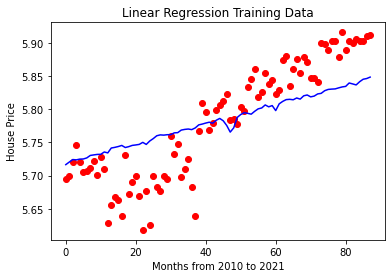

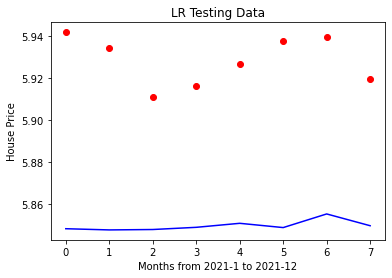

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] TEST: [ 96  97  98  99 100 101 102 103]
Test set evaluation:
_____________________________________
MAE: 0.06589284362071457
MSE: 0.005163284535392599
RMSE: 0.07185599860410123
R2 Square -7.147851134114337
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.046690750111543465
MSE: 0.0031354097963425605
RMSE: 0.055994730076522024
R2 Square 0.6340959272361782
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.065893  0.005163  0.071856  -7.147851         -3.709537


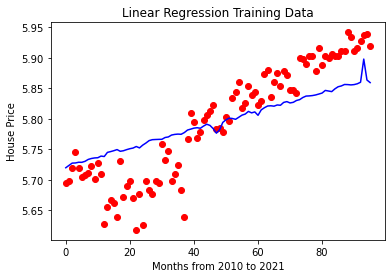

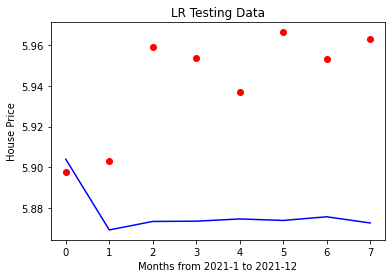

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [104 105 106 107 108 109 110 111]
Test set evaluation:
_____________________________________
MAE: 0.05851770762998998
MSE: 0.004142637231343402
RMSE: 0.06436332209685422
R2 Square -8.417480333624878
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.046501053984777475
MSE: 0.00317516765947412
RMSE: 0.056348626065540586
R2 Square 0.6658729668179053
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.058518  0.004143  0.064363   -8.41748          -

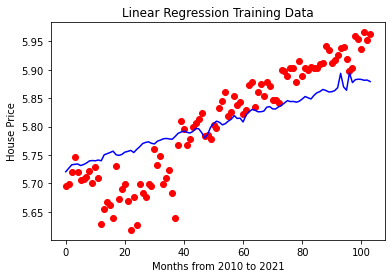

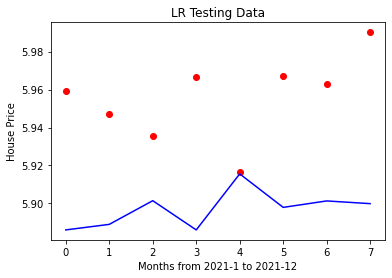

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111] TEST: [112 113 114 115 116 117 118 119]
Test set evaluation:
_____________________________________
MAE: 0.040748660600093856
MSE: 0.0018319863601652495
RMSE: 0.042801709780863305
R2 Square -4.0912139992825045
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04636443575296408
MSE: 0.0031878876009399037
RMSE: 0.056461381500454835
R2 Square 0.6920539163263235
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Validation
0  Ridge  0.040749  0.

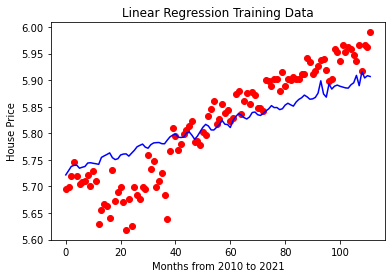

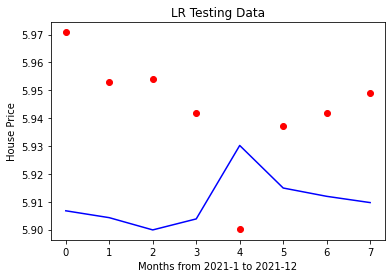

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [120 121 122 123 124 125 126 127]
Test set evaluation:
_____________________________________
MAE: 0.049460974756912246
MSE: 0.0035436999952140006
RMSE: 0.05952898449674747
R2 Square -3.5507265917233015
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04638794155150692
MSE: 0.003186089341828396
RMSE: 0.05644545457189973
R2 Square 0.7020847602976896
__________________________________
   Model       MAE       MSE      RMSE  R2 Square  Cross Vali

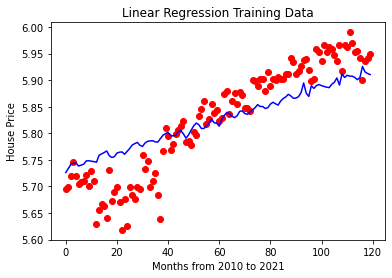

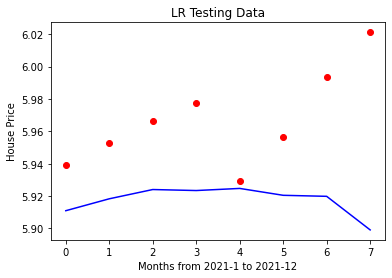

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127] TEST: [128 129 130 131 132 133 134 135]
Test set evaluation:
_____________________________________
MAE: 0.11569800468178304
MSE: 0.02408795995260056
RMSE: 0.1552029637365233
R2 Square -37.59452006549607
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04603245952358444
MSE: 0.003168573740773301
RMSE: 0.05629008563480163
R2 Square 0.7186848326982822
__________________________________
   Model       MAE       MSE     

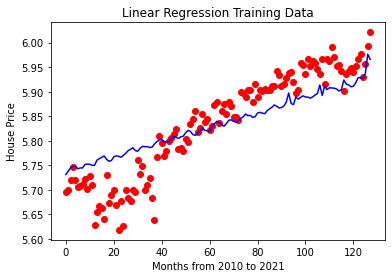

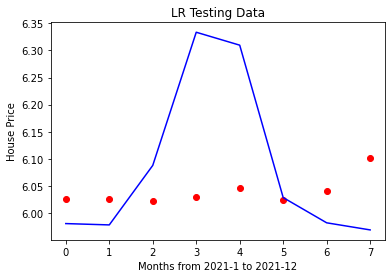

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135] TEST: [136 137 138 139 140 141 142 143]
Test set evaluation:
_____________________________________
MAE: 0.11239017385300787
MSE: 0.013318597560718258
RMSE: 0.11540622843121708
R2 Square -40.156375545755466
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04588919160867398
MSE: 0.003252877924453311
RMSE: 0.05703400673679968
R2 Square 0.7494756081318866
_________________________________

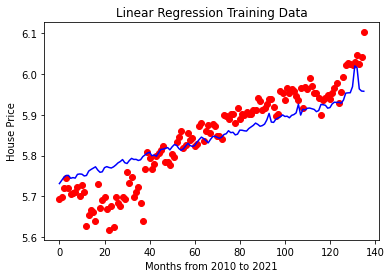

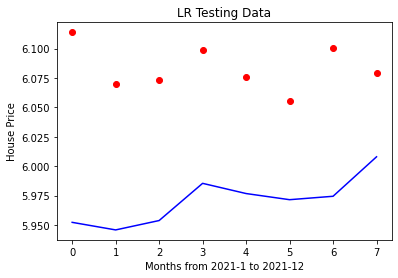

In [38]:
start = 0
while start < len(data):
  county = data.iloc[start]['County']
  print(county)
  end = start + 144

  x, y = county_dataset(data, start, end)
  x = x.to_numpy()
  y = y.to_numpy()
  train_test(x, y)
  start = end


In [62]:
#### predict

def generate(county_data, col):
  return [random.uniform(min(county_data[col]), max(county_data[col])), random.uniform(min(county_data[col]), max(county_data[col])), 
   random.uniform(min(county_data[col]), max(county_data[col])), random.uniform(min(county_data[col]), max(county_data[col])), 
   random.uniform(min(county_data[col]), max(county_data[col])), random.uniform(min(county_data[col]), max(county_data[col])),
   random.uniform(min(county_data[col]), max(county_data[col])), random.uniform(min(county_data[col]), max(county_data[col])),
   random.uniform(min(county_data[col]), max(county_data[col]))]

In [73]:
import random
for county in ['Los Angeles', 'Orange', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Clara', 'Santa Cruz']:
  county_data = data[data['County'] == county]
  ozone = county_data['Ozone']

  xx = pd.DataFrame({'Date':['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'],
                      'County': [county] * 9,
                       'Ozone':  generate(county_data, 'Ozone'),
                     'PM2.5': generate(county_data, 'PM2.5'),
                      'Conductance': generate(county_data, 'Conductance'),
                        'PH': generate(county_data, 'PH'),
                      'oil_count': generate(county_data, 'oil_count'),
                        'Gas_Well_Number': generate(county_data, 'Gas_Well_Number'),
                        	'positive_tests': generate(county_data, 'positive_tests'),
                         'fire':generate(county_data, 'fire')
                         }
                           )
  print(xx)
  #xx.columns = ['Date', 'County', 'Ozone',	'PM2.5',	'Conductance','PH',	'oil_count',	'Gas_Well_Number',	'positive_tests',	'fire']
  xx['Date'] = pd.to_datetime(xx['Date'])
  xx['Date']= xx['Date'].map(dt.datetime.toordinal)
  if county == 'Los Angeles':
    x_predict = xx
  else:
    x_predict = pd.concat([x_predict, xx], sort=False)

      Date       County     Ozone      PM2.5  Conductance        PH  \
0  2022-01  Los Angeles  0.032734  15.490632   368.607709  8.918700   
1  2022-02  Los Angeles  0.056624  16.040410  1242.948151  8.664962   
2  2022-03  Los Angeles  0.030060  14.742787  1993.188910  7.871918   
3  2022-04  Los Angeles  0.047755  15.544874  2004.535246  8.920789   
4  2022-05  Los Angeles  0.052013  22.218376  1729.420441  8.871066   
5  2022-06  Los Angeles  0.039893   6.858215  1822.159954  7.972235   
6  2022-07  Los Angeles  0.055002  14.146831  1096.487296  8.483740   
7  2022-08  Los Angeles  0.023075  14.472937   416.536104  7.884986   
8  2022-09  Los Angeles  0.056018  16.281977   624.332799  8.762544   

   oil_count  Gas_Well_Number  positive_tests       fire  
0  11.915507         1.352452   171057.869901  18.579371  
1  10.059066         1.583963   304300.264079  17.672585  
2  13.110053         1.262437   237086.500021  20.864397  
3   3.511718         1.294639   220161.411873  15.391

In [81]:
x_predict

Date       County     Ozone      PM2.5  Conductance        PH  \
0   738156  Los Angeles  0.032734  15.490632   368.607709  8.918700   
1   738187  Los Angeles  0.056624  16.040410  1242.948151  8.664962   
2   738215  Los Angeles  0.030060  14.742787  1993.188910  7.871918   
3   738246  Los Angeles  0.047755  15.544874  2004.535246  8.920789   
4   738276  Los Angeles  0.052013  22.218376  1729.420441  8.871066   
..     ...          ...       ...        ...          ...       ...   
4   738276   Santa Cruz  0.038042  31.955060  2340.842813  8.055819   
5   738307   Santa Cruz  0.036905  28.586214  2340.842813  8.055819   
6   738337   Santa Cruz  0.027861   5.616144  2340.842813  8.055819   
7   738368   Santa Cruz  0.028414  11.295257  2340.842813  8.055819   
8   738399   Santa Cruz  0.039420   7.367545  2340.842813  8.055819   

    oil_count  Gas_Well_Number  positive_tests       fire  
0   11.915507         1.352452   171057.869901  18.579371  
1   10.059066         1.583963   304300.264079  17.672585  
2   13.110053         1.262437   237086.500021  20.864397  
3    3.511718         1.294639   220161.411873  15.391496  
4    8.046594         1.674786   116412.654523   1.911932  
..        ...              ...             ...        ...  
4    6.876457         1.712460     1839.925028   0.953969  
5    6.876457         1.712460     3411.468081   0.428376  
6    6.876457         1.712460     3762.101053   0.898179  
7    6.876457         1.712460     4596.019474   0.725644  
8    6.876457         1.712460     1722.951066   0.985310  

[90 rows x 10 columns]

In [82]:
x_predict.to_csv('/content/drive/MyDrive/DS560/Data/Clean_data/predict.csv', index=False)
#df.to_csv(index=False)

In [97]:
start = 0
while start < len(data):
  county = data.iloc[start]['County']
  print(county)
  end = start + 144

  subdata = data[start:end]
  subdata['Price'] = np.log10(subdata['Price'])
  y = subdata[['Price']]
  print(y)
  dataset = subdata.drop(['County','Price'], axis=1)
  #print(dataset)

  x = dataset.to_numpy()
  y = y.to_numpy()
  print(len(x))

  model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)

  pipeline = Pipeline([
      ('std_scalar', StandardScaler())
  ])
  
  model.fit(x, y)

  X_predict = x_predict[x_predict["County"] == county]
  print(X_predict)
  X_predict.drop('County')
  print(X_predict)
  X_predict = pipeline.fit_transform(X_predict)
  y_predict = model.predict()
  print(y_predict)
  #train_test(x, y)
  start = end

Los Angeles
     Price
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
..     ...
139    NaN
140    NaN
141    NaN
142    NaN
143    NaN

[144 rows x 1 columns]
144


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X_train1 = X_train.reset_index(drop=True)
y_train1 = y_train.reset_index(drop=True)




# X2 = sm.add_constant(X_train)
#len(X_train)
#len(y_train)
est = sm.OLS(y_train1, X_train1)
est2 = est.fit()
print(est2.summary())
#model = sm.OLS(y_train, X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.965e+04
Date:                Thu, 07 Apr 2022   Prob (F-statistic):                   1.35e-194
Time:                        19:03:59   Log-Likelihood:                          45.081
No. Observations:                 138   AIC:                                     -76.16
Df Residuals:                     131   BIC:                                     -55.67
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.52.

Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28.

Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.67.

Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80.

Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.15.

In [ ]:


# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:
# pd.DataFrame({'True Values': y_test, 'Predicted Values': test_pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test['Price'], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test['Price'], test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test['Price'], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test['Price'], test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

In [ ]:
import matplotlib.pyplot as plot
plot.scatter([i for i in range(len(X_train))], y_train, color = 'red')
plot.plot([i for i in range(len(X_train))], train_pred, color = 'blue')
plot.title('Linear Regression Training Data')
plot.xlabel('Months from 2017 to 2021')
plot.ylabel('House Price')
plot.show()

In [ ]:
import matplotlib.pyplot as plot
plot.scatter([i for i in range(len(X_test))], y_test, color = 'red')
plot.plot([i for i in range(len(X_test))], test_pred, color = 'blue')
plot.title('Linear Regression Testing Data')
plot.xlabel('Months from 2021-07 to 2021-12')
plot.ylabel('House Price')
plot.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test['Price'], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test['Price'], test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)